In [1]:
# Parameters (overriden by papermill)
DATASET = 'long-linkers-enh'

In [2]:
# Parameters
DATASET = "short-linkers"


In [3]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm
sns.set_palette('Dark2')
sns.set_context('paper')
sns.set_style({'axes.axisbelow': True, 
               'axes.edgecolor': '.15',
               'axes.facecolor': 'white',
               'axes.grid': True, 
               'axes.labelcolor': '.15', 
               'figure.facecolor': 'white', 
               'grid.color': '.15',
               'grid.linestyle': ':', 
               'grid.alpha': .5, 
               'image.cmap': 'Greys', 
               'legend.frameon': False, 
               'legend.numpoints': 1, 
               'legend.scatterpoints': 1,
               'lines.solid_capstyle': 'butt', 
               'axes.spines.right': False, 
               'axes.spines.top': False,  
               'text.color': '.15',  
               'xtick.top': False, 
               'ytick.right': False, 
               'xtick.color': '.15',
               'xtick.direction': 'out', 
               'ytick.color': '.15', 
               'ytick.direction': 'out', 
              })


import matplotlib

FONT_SIZE_PT = 5
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = FONT_SIZE_PT
matplotlib.rcParams['axes.labelsize'] = FONT_SIZE_PT
matplotlib.rcParams['axes.titlesize'] = FONT_SIZE_PT
matplotlib.rcParams['figure.titlesize'] = FONT_SIZE_PT
matplotlib.rcParams['xtick.labelsize'] = FONT_SIZE_PT
matplotlib.rcParams['ytick.labelsize'] = FONT_SIZE_PT
matplotlib.rcParams['legend.fontsize'] = FONT_SIZE_PT
matplotlib.rcParams['legend.title_fontsize'] = FONT_SIZE_PT

matplotlib.rcParams['xtick.major.size'] = matplotlib.rcParams['ytick.major.size'] = 2
matplotlib.rcParams['xtick.major.width'] = matplotlib.rcParams['ytick.major.width'] = 0.5


matplotlib.rcParams['xtick.minor.size'] = matplotlib.rcParams['ytick.minor.size'] = 1

matplotlib.rcParams['xtick.minor.width'] = matplotlib.rcParams['ytick.minor.width'] = 0.5

matplotlib.rcParams['axes.linewidth'] = 0.5
matplotlib.rcParams['lines.linewidth'] = 0.5
matplotlib.rcParams['grid.linewidth'] = 0.25
matplotlib.rcParams['patch.linewidth'] = 0.25
matplotlib.rcParams['lines.markeredgewidth'] = 0.25
matplotlib.rcParams['lines.markersize'] = 2

FIVE_MM_IN_INCH = 0.19685
DPI = 600
matplotlib.rcParams['figure.figsize'] = (10 * FIVE_MM_IN_INCH, 9 * FIVE_MM_IN_INCH)
matplotlib.rcParams['savefig.dpi'] = DPI
matplotlib.rcParams['figure.dpi'] = DPI // 4


#http://phyletica.org/matplotlib-fonts/
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# (03) Excel output

In [4]:
import pathlib

INPUT_MODEL_RESULTS = pathlib.Path('outputs') / '02-transformation-and-modelling' / DATASET / f'07-output-full_results.{DATASET}.csv'
assert INPUT_MODEL_RESULTS.is_file()

INPUT_METADATA = pathlib.Path('outputs') / '01-extracting' / f'data_metadata.{DATASET}.csv'
assert INPUT_METADATA.is_file()

INPUT_NUMERIC_DATA = pathlib.Path('outputs') / '01-extracting' / f'data_numeric.{DATASET}.csv'
assert INPUT_NUMERIC_DATA.is_file()

In [5]:
import pathlib
OUTPUT_DIRECTORY = pathlib.Path('outputs') / '03-excel-output' / DATASET

if not OUTPUT_DIRECTORY.is_dir():
    OUTPUT_DIRECTORY.mkdir(parents=True)

### Reading

In [6]:
data_metadata = pd.read_csv(INPUT_METADATA, index_col=0)
data_metadata

,# AAs,# PSMs,# Peptides,# Peptides (by Search Engine): Mascot,# Unique Peptides,Accession,Coverage [%],Description,Gene,MW [kDa],Score Mascot: Mascot,calc. pI
Label,,,,,,,,,,,,
MYH9,1960,35190,178,178,142,P35579,71,Myosin-9 OS=Homo sapiens GN=MYH9 PE=1 SV=4,MYH9,226.4,1244592,5.60
CONT_P22629,183,13859,9,9,9,CONT_P22629,43,Streptavidin OS=Streptomyces avidinii PE=1 SV=1,NaN,18.8,639027,8.35
SPTAN1 (1),2477,14713,177,177,4,Q13813-2,74,"Isoform 2 of Spectrin alpha chain, non-erythro...",SPTAN1,284.9,543452,5.35
SPTAN1 (2),2452,14454,175,175,2,Q13813-3,74,"Isoform 3 of Spectrin alpha chain, non-erythro...",SPTAN1,282.1,534079,5.34
SPTBN1,2364,12324,148,148,16,Q01082,73,"Spectrin beta chain, non-erythrocytic 1 OS=Hom...",SPTBN1,274.4,455043,5.57
...,...,...,...,...,...,...,...,...,...,...,...,...
PPIH,177,2,2,2,2,O43447,11,Peptidyl-prolyl cis-trans isomerase H OS=Homo ...,PPIH,19.2,20,8.07
REST,1097,2,2,2,2,Q13127,3,RE1-silencing transcription factor OS=Homo sap...,REST,121.8,19,6.74
ZMYM2,1377,4,2,2,2,Q9UBW7,3,Zinc finger MYM-type protein 2 OS=Homo sapiens...,ZMYM2,154.8,18,6.34


In [7]:
data_unnormalised_numeric = pd.read_csv(INPUT_NUMERIC_DATA, index_col=0)
data_unnormalised_numeric.columns.name = 'Experiment_Linker_Replicate'
data_unnormalised_numeric

Experiment_Linker_Replicate,H3K9me3_45bp__1,H3K9me3_50bp__1,H3K9me3_55bp__1,H3K27me3_35bp__1,H3K27me3_40bp__1,H3K27me3_45bp__1,H3K27me3_50bp__1,H3K27me3_55bp__1,H3unmod_35bp_1,H3unmod_40bp_1,...,H3K27me3_45bp__3,H3K27me3_50bp__3,H3K27me3_55bp__3,H3unmod_35bp_3,H3unmod_40bp_3,H3unmod_45bp_3,H3unmod_50bp__3,H3unmod_55bp_3,H3K9me3_35bp_3,H3K9me3_40bp_3
Label,,,,,,,,,,,,,,,,,,,,,
MYH9,6.819964e+09,3.963794e+09,2.897327e+09,2.612789e+09,3.547799e+09,5.158553e+09,4.680400e+09,3.737984e+09,5.536170e+09,4.129462e+09,...,4.917671e+09,3.194571e+09,2.376342e+09,3.601253e+09,3.044944e+09,2.370098e+09,2.235995e+09,2.117592e+09,2.953362e+09,3.526135e+09
CONT_P22629,1.678608e+11,9.968195e+10,8.049941e+10,8.428746e+10,1.168859e+11,1.351942e+11,1.204745e+11,1.083326e+11,1.652194e+11,1.718156e+11,...,1.543118e+11,1.635709e+11,1.490961e+11,1.250698e+11,1.315705e+11,1.476743e+11,1.501223e+11,1.434065e+11,1.102874e+11,1.734283e+11
SPTAN1 (1),4.115371e+08,3.049329e+08,3.010968e+08,2.392642e+08,3.259265e+08,2.979199e+08,3.541832e+08,3.175957e+08,3.776293e+08,4.368028e+08,...,3.154580e+08,2.743185e+08,2.136172e+08,2.431761e+08,2.975633e+08,2.085097e+08,2.214926e+08,2.166143e+08,2.752575e+08,2.904916e+08
SPTAN1 (2),9.686431e+07,6.974094e+07,1.056995e+08,2.127134e+07,3.049779e+07,3.668813e+07,2.716616e+07,9.795320e+07,3.772729e+07,2.814881e+07,...,6.329383e+07,1.368255e+07,3.001479e+07,2.126239e+07,1.273656e+07,3.996528e+07,3.643755e+07,2.781690e+07,2.126948e+07,2.714264e+07
SPTBN1,8.423170e+08,4.273369e+08,3.779590e+08,3.116994e+08,4.303684e+08,5.639140e+08,5.239536e+08,4.354570e+08,6.862634e+08,5.744966e+08,...,5.725942e+08,3.604934e+08,2.890564e+08,4.099113e+08,3.767596e+08,3.096504e+08,3.130653e+08,2.897160e+08,3.523080e+08,4.485469e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PPIH,8.208740e+06,5.630328e+06,4.614936e+06,3.649492e+06,6.889746e+06,9.805449e+06,8.320742e+06,6.795732e+06,9.533400e+06,6.425513e+06,...,8.337931e+06,5.108742e+06,5.609399e+06,6.516111e+06,5.161312e+06,4.887423e+06,3.992957e+06,5.466729e+06,6.087354e+06,6.976574e+06
REST,9.025333e+06,5.320499e+06,4.271593e+06,2.797718e+06,2.053074e+06,2.780208e+06,3.293669e+06,4.890174e+06,2.331154e+06,2.180329e+06,...,3.206053e+06,2.139342e+06,1.965312e+06,3.654042e+06,4.037978e+06,2.677056e+06,3.967470e+06,1.667799e+06,3.378881e+06,4.286108e+06
ZMYM2,4.184675e+06,3.274722e+06,2.078605e+06,2.341450e+06,2.731178e+06,2.227722e+06,0.000000e+00,2.238157e+06,0.000000e+00,1.915954e+06,...,2.560600e+06,2.278582e+06,2.618470e+06,2.699438e+06,2.219889e+06,2.519002e+06,2.935428e+06,3.243666e+06,2.416495e+06,3.896194e+06


### Model outputs

Let's read the model outputs:

In [8]:
data_model_outputs = pd.read_csv(INPUT_MODEL_RESULTS, index_col=0)
data_model_outputs.columns = pd.MultiIndex.from_tuples([c.split('___') for c in data_model_outputs.columns])
data_model_outputs

normalised_data                                                   \
            H3K9me3_45bp__1 H3K9me3_50bp__1 H3K9me3_55bp__1 H3K27me3_35bp__1   
Label                                                                          
MYH9              32.049976       31.463273       31.322974        31.598012   
CONT_P22629       36.671334       36.115652       36.119158        36.609667   
SPTAN1 (1)        27.999307       27.762955       28.056551        28.149097   
SPTAN1 (2)        25.912321       25.634541       26.546293        24.657475   
SPTBN1            29.032648       28.249837       28.384553        28.530648   
...                     ...             ...             ...              ...   
PPIH              22.351589       22.003826       22.028778        22.114332   
REST              22.488408       21.922169       21.917242        21.730887   
ZMYM2             21.379544       21.221980       20.878083        21.474039   
RYR2              25.806502       25.696849       25.231550        26.091213   
NES               23.978606       22.621958       21.650883        24.128092   

                                                                \
            H3K27me3_40bp__1 H3K27me3_45bp__1 H3K27me3_50bp__1   
Label                                                            
MYH9               31.737222        31.922085        31.821147   
CONT_P22629        36.779255        36.634008        36.507100   
SPTAN1 (1)         28.292916        27.808115        28.097083   
SPTAN1 (2)         24.875146        24.786576        24.392470   
SPTBN1             28.693942        28.728665        28.662026   
...                      ...              ...              ...   
PPIH               22.728964        22.882918        22.685443   
REST               20.982299        21.064527        21.348427   
ZMYM2              21.394037        20.744903              NaN   
RYR2               26.265342        25.779230        26.065330   
NES                23.521842        23.436501        23.114786   

                                                            ...  \
            H3K27me3_55bp__1 H3unmod_35bp_1 H3unmod_40bp_1  ...   
Label                                                       ...   
MYH9               31.546775      32.123529      31.627403  ...   
CONT_P22629        36.403839      37.022880      37.006167  ...   
SPTAN1 (1)         27.989778      28.249683      28.386503  ...   
SPTAN1 (2)         26.292752      24.926393      24.430667  ...   
SPTBN1             28.445117      29.111475      28.781820  ...   
...                      ...            ...            ...  ...   
PPIH               22.443360      22.941847      22.299477  ...   
REST               21.968617      20.909900      20.740211  ...   
ZMYM2              20.841042            NaN      20.553728  ...   
RYR2               25.324118      26.187812      26.030866  ...   
NES                21.729220      24.304398      23.905718  ...   

                linker_45bp_vs_50bp_H3unmod linker_55bp_vs_50bp_H3K27me3  \
            logFC_based_on_single_datapoint                logFC_imputed   
Label                                                                      
MYH9                                  False                    -0.625819   
CONT_P22629                           False                    -0.176797   
SPTAN1 (1)                            False                    -0.380292   
SPTAN1 (2)                            False                     0.938373   
SPTBN1                                False                    -0.479422   
...                                     ...                          ...   
PPIH                                  False                    -0.201932   
REST                                  False                     0.110087   
ZMYM2                                 False                    -0.262162   
RYR2                                  False                    -0.219733   
NES                                   F

In [9]:
full_model_data_columns = data_model_outputs.columns.get_level_values(0).unique()
full_model_data_columns

Index(['normalised_data', 'normalised_data_to_reference_experiment', 'comment',
       'modif_H3K27me3_vs_H3unmod_35bp', 'modif_H3K27me3_vs_H3unmod_40bp',
       'modif_H3K27me3_vs_H3unmod_45bp', 'modif_H3K27me3_vs_H3unmod_50bp',
       'modif_H3K27me3_vs_H3unmod_55bp', 'modif_H3K9me3_vs_H3unmod_35bp',
       'modif_H3K9me3_vs_H3unmod_40bp', 'modif_H3K9me3_vs_H3unmod_45bp',
       'modif_H3K9me3_vs_H3unmod_50bp', 'modif_H3K9me3_vs_H3unmod_55bp',
       'linker_35bp_vs_50bp_H3K27me3', 'linker_40bp_vs_50bp_H3K27me3',
       'linker_45bp_vs_50bp_H3K27me3', 'linker_55bp_vs_50bp_H3K27me3',
       'linker_35bp_vs_50bp_H3K9me3', 'linker_40bp_vs_50bp_H3K9me3',
       'linker_45bp_vs_50bp_H3K9me3', 'linker_55bp_vs_50bp_H3K9me3',
       'linker_35bp_vs_50bp_H3unmod', 'linker_40bp_vs_50bp_H3unmod',
       'linker_45bp_vs_50bp_H3unmod', 'linker_55bp_vs_50bp_H3unmod',
       'coefficient_estimates'],
      dtype='object')

And split the normalised data away from the coefficients, away from other data:

In [10]:
data_model_outputs_normalised_data = data_model_outputs['normalised_data']
data_model_outputs_ref_normalised_data = data_model_outputs['normalised_data_to_reference_experiment']
data_model_outputs_coefficients = data_model_outputs['coefficient_estimates']
data_model_outputs_estimates = data_model_outputs[full_model_data_columns.difference(['normalised_data', 'normalised_data_to_reference_experiment', 'coefficient_estimates'])]

In [11]:
MODEL_COEFS = sorted(set(data_model_outputs_estimates.columns.get_level_values(0).unique()) - set(['comment']))
MODEL_COEFS

['linker_35bp_vs_50bp_H3K27me3',
 'linker_35bp_vs_50bp_H3K9me3',
 'linker_35bp_vs_50bp_H3unmod',
 'linker_40bp_vs_50bp_H3K27me3',
 'linker_40bp_vs_50bp_H3K9me3',
 'linker_40bp_vs_50bp_H3unmod',
 'linker_45bp_vs_50bp_H3K27me3',
 'linker_45bp_vs_50bp_H3K9me3',
 'linker_45bp_vs_50bp_H3unmod',
 'linker_55bp_vs_50bp_H3K27me3',
 'linker_55bp_vs_50bp_H3K9me3',
 'linker_55bp_vs_50bp_H3unmod',
 'modif_H3K27me3_vs_H3unmod_35bp',
 'modif_H3K27me3_vs_H3unmod_40bp',
 'modif_H3K27me3_vs_H3unmod_45bp',
 'modif_H3K27me3_vs_H3unmod_50bp',
 'modif_H3K27me3_vs_H3unmod_55bp',
 'modif_H3K9me3_vs_H3unmod_35bp',
 'modif_H3K9me3_vs_H3unmod_40bp',
 'modif_H3K9me3_vs_H3unmod_45bp',
 'modif_H3K9me3_vs_H3unmod_50bp',
 'modif_H3K9me3_vs_H3unmod_55bp']

In [12]:
data_model_outputs_normalised_data

,H3K9me3_45bp__1,H3K9me3_50bp__1,H3K9me3_55bp__1,H3K27me3_35bp__1,H3K27me3_40bp__1,H3K27me3_45bp__1,H3K27me3_50bp__1,H3K27me3_55bp__1,H3unmod_35bp_1,H3unmod_40bp_1,...,H3K27me3_45bp__3,H3K27me3_50bp__3,H3K27me3_55bp__3,H3unmod_35bp_3,H3unmod_40bp_3,H3unmod_45bp_3,H3unmod_50bp__3,H3unmod_55bp_3,H3K9me3_35bp_3,H3K9me3_40bp_3
Label,,,,,,,,,,,,,,,,,,,,,
MYH9,32.049976,31.463273,31.322974,31.598012,31.737222,31.922085,31.821147,31.546775,32.123529,31.627403,...,31.872945,31.519395,31.131198,31.929074,31.431108,31.147919,31.159580,31.159986,31.746782,31.515863
CONT_P22629,36.671334,36.115652,36.119158,36.609667,36.779255,36.634008,36.507100,36.403839,37.022880,37.006167,...,36.844674,37.197546,37.102554,37.047164,36.864384,37.109247,37.228658,37.241527,36.969549,37.135971
SPTAN1 (1),27.999307,27.762955,28.056551,28.149097,28.292916,27.808115,28.097083,27.989778,28.249683,28.386503,...,27.910490,27.977697,27.655555,28.040648,28.075961,27.641159,27.823993,27.870762,28.323278,27.914344
SPTAN1 (2),25.912321,25.634541,26.546293,24.657475,24.875146,24.786576,24.392470,26.292752,24.926393,24.430667,...,25.593179,23.652254,24.824273,24.525023,23.529812,25.257863,25.220233,24.909667,24.629352,24.494480
SPTBN1,29.032648,28.249837,28.384553,28.530648,28.693942,28.728665,28.662026,28.445117,29.111475,28.781820,...,28.770555,28.371818,28.091878,28.793959,28.416409,28.211684,28.323198,28.290272,28.679333,28.541106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PPIH,22.351589,22.003826,22.028778,22.114332,22.728964,22.882918,22.685443,22.443360,22.941847,22.299477,...,22.668875,22.230957,22.404517,22.818802,22.226646,22.226262,22.030336,22.562455,22.824455,22.534510
REST,22.488408,21.922169,21.917242,21.730887,20.982299,21.064527,21.348427,21.968617,20.909900,20.740211,...,21.289984,20.975156,20.891429,21.984283,21.872541,21.357835,22.021098,20.849722,21.975185,21.831659
ZMYM2,21.379544,21.221980,20.878083,21.474039,21.394037,20.744903,NaN,20.841042,NaN,20.553728,...,20.965667,21.066125,21.305395,21.547450,21.009396,21.270040,21.586449,21.809402,21.491556,21.694057


In [13]:
data_model_outputs_estimates

comment linker_35bp_vs_50bp_H3K27me3                      \
            comment                        logFC         t   P.Value   
Label                                                                  
MYH9            NaN                     0.259055  0.887266  0.381594   
CONT_P22629     NaN                     0.467045  1.208056  0.235950   
SPTAN1 (1)      NaN                     0.503959  2.610764  0.013663   
SPTAN1 (2)      NaN                     0.258722  0.313316  0.756098   
SPTBN1          NaN                     0.368833  1.443606  0.158625   
...             ...                          ...       ...       ...   
PPIH            NaN                    -0.058198 -0.192759  0.848373   
REST            NaN                    -0.174873 -0.394831  0.695618   
ZMYM2           NaN                     0.707915  2.266146  0.031132   
RYR2            NaN                     0.285506  0.953691  0.347430   
NES             NaN                     1.353732  2.087163  0.045019   

                                                                           \
            adj.P.Val         B significant significant_with_large_log2fc   
Label                                                                       
MYH9         0.670000 -6.322104       False                         False   
CONT_P22629  0.546743 -5.992227       False                         False   
SPTAN1 (1)   0.173238 -3.582661       False                         False   
SPTAN1 (2)   0.898037 -6.667502       False                         False   
SPTBN1       0.474202 -5.691725       False                         False   
...               ...       ...         ...                           ...   
PPIH         0.938732 -6.698456       False                         False   
REST         0.860758 -6.638273       False                         False   
ZMYM2        0.259207 -4.228230       False                         False   
RYR2         0.654974 -6.261581       False                         False   
NES          0.298869 -4.644398       False                         False   

                                            ... modif_H3K9me3_vs_H3unmod_55bp  \
            logFC_imputed logFC_is_imputed  ...                         logFC   
Label                                       ...                                 
MYH9             0.259055            False  ...                     -0.214186   
CONT_P22629      0.467045            False  ...                     -0.474352   
SPTAN1 (1)       0.503959            False  ...                      0.032522   
SPTAN1 (2)       0.258722            False  ...                     -0.038611   
SPTBN1           0.368833            False  ...                     -0.250297   
...                   ...              ...  ...                           ...   
PPIH            -0.058198            False  ...                     -0.552414   
REST            -0.174873            False  ...                      0.135477   
ZMYM2            0.707915            False  ...                     -0.367450   
RYR2             0.285506            False  ...                     -0.152625   
NES              1.353732            False  ...                     -1.477041   

                                                                 \
                    t   P.Value adj.P.Val         B significant   
Label                                                             
MYH9        -0.820180  0.418216  0.807389 -6.014495       False   
CONT_P22629 -1.371779  0.179752  0.700191 -5.433671       False   
SPTAN1 (1)   0.188368  0.851785  0.963023 -6.329634       False   
SPTAN1 (2)  -0.052277  0.958637  0.988109 -6.346005       False   
SPTBN1      -1.095293  0.281611  0.752535 -5.758653       False   
...               ...       ...       ...       ...         ...   
PPIH        -2.045611  0.049137  0.635576 -4.384678       False   
REST         0.341987  0.734623  0.924042 -6.288971       False   
ZMYM2       -1.440622  0.160470  0.689704 -5.342812 

## Grouping of proteins

We will group the proteins by the model's classifications into linker- and modification- responsive groups

In [14]:
model_columns = set(data_model_outputs_estimates.columns.get_level_values(0).unique()) - set(['comment'])
model_columns

{'linker_35bp_vs_50bp_H3K27me3',
 'linker_35bp_vs_50bp_H3K9me3',
 'linker_35bp_vs_50bp_H3unmod',
 'linker_40bp_vs_50bp_H3K27me3',
 'linker_40bp_vs_50bp_H3K9me3',
 'linker_40bp_vs_50bp_H3unmod',
 'linker_45bp_vs_50bp_H3K27me3',
 'linker_45bp_vs_50bp_H3K9me3',
 'linker_45bp_vs_50bp_H3unmod',
 'linker_55bp_vs_50bp_H3K27me3',
 'linker_55bp_vs_50bp_H3K9me3',
 'linker_55bp_vs_50bp_H3unmod',
 'modif_H3K27me3_vs_H3unmod_35bp',
 'modif_H3K27me3_vs_H3unmod_40bp',
 'modif_H3K27me3_vs_H3unmod_45bp',
 'modif_H3K27me3_vs_H3unmod_50bp',
 'modif_H3K27me3_vs_H3unmod_55bp',
 'modif_H3K9me3_vs_H3unmod_35bp',
 'modif_H3K9me3_vs_H3unmod_40bp',
 'modif_H3K9me3_vs_H3unmod_45bp',
 'modif_H3K9me3_vs_H3unmod_50bp',
 'modif_H3K9me3_vs_H3unmod_55bp'}

In [15]:
linker_columns = {c for c in model_columns if c.startswith('linker_')}
linker_columns

{'linker_35bp_vs_50bp_H3K27me3',
 'linker_35bp_vs_50bp_H3K9me3',
 'linker_35bp_vs_50bp_H3unmod',
 'linker_40bp_vs_50bp_H3K27me3',
 'linker_40bp_vs_50bp_H3K9me3',
 'linker_40bp_vs_50bp_H3unmod',
 'linker_45bp_vs_50bp_H3K27me3',
 'linker_45bp_vs_50bp_H3K9me3',
 'linker_45bp_vs_50bp_H3unmod',
 'linker_55bp_vs_50bp_H3K27me3',
 'linker_55bp_vs_50bp_H3K9me3',
 'linker_55bp_vs_50bp_H3unmod'}

In [16]:
modif_columns = {c for c in model_columns if c.startswith('modif_')}
modif_columns

{'modif_H3K27me3_vs_H3unmod_35bp',
 'modif_H3K27me3_vs_H3unmod_40bp',
 'modif_H3K27me3_vs_H3unmod_45bp',
 'modif_H3K27me3_vs_H3unmod_50bp',
 'modif_H3K27me3_vs_H3unmod_55bp',
 'modif_H3K9me3_vs_H3unmod_35bp',
 'modif_H3K9me3_vs_H3unmod_40bp',
 'modif_H3K9me3_vs_H3unmod_45bp',
 'modif_H3K9me3_vs_H3unmod_50bp',
 'modif_H3K9me3_vs_H3unmod_55bp'}

In [17]:
data_model_outputs_estimates.loc(axis=1)[:, 'significant'].sum()

linker_35bp_vs_50bp_H3K27me3    significant    53
linker_35bp_vs_50bp_H3K9me3     significant    38
linker_35bp_vs_50bp_H3unmod     significant    13
linker_40bp_vs_50bp_H3K27me3    significant    10
linker_40bp_vs_50bp_H3K9me3     significant     9
linker_40bp_vs_50bp_H3unmod     significant    11
linker_45bp_vs_50bp_H3K27me3    significant     0
linker_45bp_vs_50bp_H3K9me3     significant     0
linker_45bp_vs_50bp_H3unmod     significant     1
linker_55bp_vs_50bp_H3K27me3    significant    23
linker_55bp_vs_50bp_H3K9me3     significant    23
linker_55bp_vs_50bp_H3unmod     significant    18
modif_H3K27me3_vs_H3unmod_35bp  significant    49
modif_H3K27me3_vs_H3unmod_40bp  significant    43
modif_H3K27me3_vs_H3unmod_45bp  significant    37
modif_H3K27me3_vs_H3unmod_50bp  significant    30
modif_H3K27me3_vs_H3unmod_55bp  significant    33
modif_H3K9me3_vs_H3unmod_35bp   significant    14
modif_H3K9me3_vs_H3unmod_40bp   significant    16
modif_H3K9me3_vs_H3unmod_45bp   significant    23


In [18]:
data_model_outputs_estimates.loc(axis=1)[:, 'significant_with_large_log2fc'].sum()

linker_35bp_vs_50bp_H3K27me3    significant_with_large_log2fc    34
linker_35bp_vs_50bp_H3K9me3     significant_with_large_log2fc    22
linker_35bp_vs_50bp_H3unmod     significant_with_large_log2fc    12
linker_40bp_vs_50bp_H3K27me3    significant_with_large_log2fc     9
linker_40bp_vs_50bp_H3K9me3     significant_with_large_log2fc     8
linker_40bp_vs_50bp_H3unmod     significant_with_large_log2fc    10
linker_45bp_vs_50bp_H3K27me3    significant_with_large_log2fc     0
linker_45bp_vs_50bp_H3K9me3     significant_with_large_log2fc     0
linker_45bp_vs_50bp_H3unmod     significant_with_large_log2fc     1
linker_55bp_vs_50bp_H3K27me3    significant_with_large_log2fc    18
linker_55bp_vs_50bp_H3K9me3     significant_with_large_log2fc    17
linker_55bp_vs_50bp_H3unmod     significant_with_large_log2fc    16
modif_H3K27me3_vs_H3unmod_35bp  significant_with_large_log2fc    32
modif_H3K27me3_vs_H3unmod_40bp  significant_with_large_log2fc    23
modif_H3K27me3_vs_H3unmod_45bp  significant_with

Protein is modification- or linker-responsive if any of the modif_ or linker_columns are significant_with_large_log2fc:

In [19]:
data_model_classifications = pd.DataFrame({
    'modif_responsive': data_model_outputs_estimates.loc(axis=1)[list(modif_columns), 'significant_with_large_log2fc'].any(axis=1),
    'linker_responsive': data_model_outputs_estimates.loc(axis=1)[list(linker_columns), 'significant_with_large_log2fc'].any(axis=1),
})

In [20]:
data_model_classifications.sum()

modif_responsive     70
linker_responsive    57
dtype: int64

## Collecting data for output

It always makes sense to start with metadata

In [21]:
excel_metadata = data_metadata.copy()

# Copy the label into metadata so we don't nee to reset index
excel_metadata['Label'] = excel_metadata.index

# Some columns should be before others
_first_columns = ['Label', 'Accession', 'Gene', 'Description'] 
excel_metadata = excel_metadata[_first_columns + list(excel_metadata.columns.difference(_first_columns))]

# Add a header columns
excel_metadata.columns = pd.MultiIndex.from_tuples([('metadata', c) for c in excel_metadata.columns])

excel_metadata

metadata                       \
                   Label    Accession    Gene   
Label                                           
MYH9                MYH9       P35579    MYH9   
CONT_P22629  CONT_P22629  CONT_P22629     NaN   
SPTAN1 (1)    SPTAN1 (1)     Q13813-2  SPTAN1   
SPTAN1 (2)    SPTAN1 (2)     Q13813-3  SPTAN1   
SPTBN1            SPTBN1       Q01082  SPTBN1   
...                  ...          ...     ...   
PPIH                PPIH       O43447    PPIH   
REST                REST       Q13127    REST   
ZMYM2              ZMYM2       Q9UBW7   ZMYM2   
RYR2                RYR2       Q92736    RYR2   
NES                  NES       P48681     NES   

                                                                             \
                                                   Description # AAs # PSMs   
Label                                                                         
MYH9                Myosin-9 OS=Homo sapiens GN=MYH9 PE=1 SV=4  1960  35190   
CONT_P22629    Streptavidin OS=Streptomyces avidinii PE=1 SV=1   183  13859   
SPTAN1 (1)   Isoform 2 of Spectrin alpha chain, non-erythro...  2477  14713   
SPTAN1 (2)   Isoform 3 of Spectrin alpha chain, non-erythro...  2452  14454   
SPTBN1       Spectrin beta chain, non-erythrocytic 1 OS=Hom...  2364  12324   
...                                                        ...   ...    ...   
PPIH         Peptidyl-prolyl cis-trans isomerase H OS=Homo ...   177      2   
REST         RE1-silencing transcription factor OS=Homo sap...  1097      2   
ZMYM2        Zinc finger MYM-type protein 2 OS=Homo sapiens...  1377      4   
RYR2         Ryanodine receptor 2 OS=Homo sapiens GN=RYR2 P...  4967      2   
NES                    Nestin OS=Homo sapiens GN=NES PE=1 SV=2  1621     34   

                                                              \
            # Peptides # Peptides (by Search Engine): Mascot   
Label                                                          
MYH9               178                                   178   
CONT_P22629          9                                     9   
SPTAN1 (1)         177                                   177   
SPTAN1 (2)         175                                   175   
SPTBN1             148                                   148   
...                ...                                   ...   
PPIH                 2                                     2   
REST                 2                                     2   
ZMYM2                2                                     2   
RYR2                 2                                     2   
NES                  2                                     2   

                                                                          \
            # Unique Peptides Coverage [%] MW [kDa] Score Mascot: Mascot   
Label                                                                      
MYH9                      142           71    226.4              1244592   
CONT_P22629                 9           43     18.8               639027   
SPTAN1 (1)                  4           74    284.9               543452   
SPTAN1 (2)                  2           74    282.1               534079   
SPTBN1                     16           73    274.4               455043   
...                       ...          ...      ...                  ...   
PPIH                        2           11     19.2                   20   
REST                        2            3    121.8                   19   
ZMYM2                       2            3    154.8                   18   
RYR2                        2            0    564.2                   15   
NES                         2            1    177.3                    0   

                      
            calc. pI  
Label                 
MYH9            5.60  
CONT_P22629     8.35  
SPTAN1 (1)      5.35  
SPTAN1 (2)      5.34  
SPTBN1          5.57  
...              ...  
PPIH            8.07  
REST            6.74  
ZMYM2  

#### Raw data

Now let's shape the raw data into something more useful too

In [22]:
excel_raw_data = data_unnormalised_numeric.copy()
excel_raw_data = excel_raw_data.sort_index(axis=1)
# Add a header column
excel_raw_data.columns = pd.MultiIndex.from_tuples([('raw_data', c) for c in excel_raw_data.columns])

excel_raw_data

raw_data                                    \
            H3K27me3_35bp__1 H3K27me3_35bp__2 H3K27me3_35bp__3   
Label                                                            
MYH9            2.612789e+09     4.702677e+08     3.071327e+09   
CONT_P22629     8.428746e+10     2.440297e+10     1.142324e+11   
SPTAN1 (1)      2.392642e+08     1.203315e+07     2.592204e+08   
SPTAN1 (2)      2.127134e+07     3.765995e+05     1.600020e+07   
SPTBN1          3.116994e+08     3.908154e+07     3.462962e+08   
...                      ...              ...              ...   
PPIH            3.649492e+06     0.000000e+00     3.780386e+06   
REST            2.797718e+06     0.000000e+00     1.045514e+06   
ZMYM2           2.341450e+06     0.000000e+00     2.106190e+06   
RYR2            5.746359e+07     1.176839e+07     5.842384e+07   
NES             1.473786e+07     2.720559e+06     2.365809e+07   

                                                                \
            H3K27me3_40bp__1 H3K27me3_40bp__2 H3K27me3_40bp__3   
Label                                                            
MYH9            3.547799e+09     4.452104e+09     3.439635e+09   
CONT_P22629     1.168859e+11     8.504908e+10     1.731907e+11   
SPTAN1 (1)      3.259265e+08     2.906101e+08     2.966484e+08   
SPTAN1 (2)      3.049779e+07     2.332886e+07     2.586304e+07   
SPTBN1          4.303684e+08     4.613456e+08     4.272672e+08   
...                      ...              ...              ...   
PPIH            6.889746e+06     4.812050e+06     5.339384e+06   
REST            2.053074e+06     4.511392e+06     3.946048e+06   
ZMYM2           2.731178e+06     1.771580e+06     2.238720e+06   
RYR2            7.993905e+07     6.784721e+07     7.253599e+07   
NES             1.193667e+07     9.769988e+06     1.700175e+07   

                                                                \
            H3K27me3_45bp__1 H3K27me3_45bp__2 H3K27me3_45bp__3   
Label                                                            
MYH9            5.158553e+09     2.561619e+09     4.917671e+09   
CONT_P22629     1.351942e+11     9.600564e+10     1.543118e+11   
SPTAN1 (1)      2.979199e+08     2.379658e+08     3.154580e+08   
SPTAN1 (2)      3.668813e+07     8.133884e+07     6.329383e+07   
SPTBN1          5.639140e+08     3.169924e+08     5.725942e+08   
...                      ...              ...              ...   
PPIH            9.805449e+06     3.921243e+06     8.337931e+06   
REST            2.780208e+06     4.092901e+06     3.206053e+06   
ZMYM2           2.227722e+06     2.675180e+06     2.560600e+06   
RYR2            7.300359e+07     4.764314e+07     7.315338e+07   
NES             1.439172e+07     3.707371e+06     1.356249e+07   

                              ...                                \
            H3K27me3_50bp__1  ... H3unmod_40bp_3 H3unmod_45bp_1   
Label                         ...                                 
MYH9            4.680400e+09  ...   3.044944e+09   3.946367e+09   
CONT_P22629     1.204745e+11  ...   1.315705e+11   1.630744e+11   
SPTAN1 (1)      3.541832e+08  ...   2.975633e+08   3.424137e+08   
SPTAN1 (2)      2.716616e+07  ...   1.273656e+07   5.081667e+07   
SPTBN1          5.239536e+08  ...   3.767596e+08   5.129878e+08   
...                      ...  ...            ...            ...   
PPIH            8.320742e+06  ...   5.161312e+06   5.793653e+06   
REST            3.293669e+06  ...   4.037978e+06   6.090768e+06   
ZMYM2           0.000000e+00  ...   2.219889e+06   2.993301e+06   
RYR2            8.661822e+07  ...   6.226795e+07   7.910849e+07   
NES             1.120488e+07  ...   9.937108e+06   1.262545e+07   

                                                                           \
            H3unmod_45bp_2 H3unmod_45bp_3 H3unmod_50bp__1 H3unmod_50bp__2   
Label                                                                       
MYH9          3.121982e+09   2.370098e+09    5.153229e+09    6.759069e+09  

#### Normalised data

Likewise for normalised data

In [23]:
excel_normalised_data = data_model_outputs_normalised_data.copy()
excel_normalised_data = excel_normalised_data.sort_index(axis=1)

# Add a header column
excel_normalised_data.columns = pd.MultiIndex.from_tuples([('normalised_data_log2', c) for c in excel_normalised_data.columns])

excel_normalised_data

normalised_data_log2                                    \
                H3K27me3_35bp__1 H3K27me3_35bp__2 H3K27me3_35bp__3   
Label                                                                
MYH9                   31.598012        31.776365        32.447801   
CONT_P22629            36.609667        37.473796        37.664767   
SPTAN1 (1)             28.149097        26.487969        28.881190   
SPTAN1 (2)             24.657475        21.490130        24.863173   
SPTBN1                 28.530648        28.187442        29.299017   
...                          ...              ...              ...   
PPIH                   22.114332              NaN        22.781688   
REST                   21.730887              NaN        20.927367   
ZMYM2                  21.474039              NaN        21.937791   
RYR2                   26.091213        26.455872        26.731640   
NES                    24.128092        24.342930        25.427416   

                                                                \
            H3K27me3_40bp__1 H3K27me3_40bp__2 H3K27me3_40bp__3   
Label                                                            
MYH9               31.737222        32.098963        31.914560   
CONT_P22629        36.779255        36.354700        37.568523   
SPTAN1 (1)         28.292916        28.161633        28.379131   
SPTAN1 (2)         24.875146        24.522736        24.859341   
SPTBN1             28.693942        28.828396        28.905516   
...                      ...              ...              ...   
PPIH               22.728964        22.245343        22.583194   
REST               20.982299        22.152264        22.146929   
ZMYM2              21.394037        20.803729        21.329195   
RYR2               26.265342        26.062910        26.347146   
NES                23.521842        23.267049        24.254133   

                                                                \
            H3K27me3_45bp__1 H3K27me3_45bp__2 H3K27me3_45bp__3   
Label                                                            
MYH9               31.922085        31.217231        31.872945   
CONT_P22629        36.634008        36.445223        36.844674   
SPTAN1 (1)         27.808115        27.789002        27.910490   
SPTAN1 (2)         24.786576        26.240264        25.593179   
SPTBN1             28.728665        28.202696        28.770555   
...                      ...              ...              ...   
PPIH               22.882918        21.865702        22.668875   
REST               21.064527        21.927515        21.289984   
ZMYM2              20.744903        21.314027        20.965667   
RYR2               25.779230        25.468588        25.802038   
NES                23.436501        21.784788        23.370735   

                              ...                                \
            H3K27me3_50bp__1  ... H3unmod_40bp_3 H3unmod_45bp_1   
Label                         ...                                 
MYH9               31.821147  ...      31.431108      31.560448   
CONT_P22629        36.507100  ...      36.864384      36.929309   
SPTAN1 (1)         28.097083  ...      28.075961      28.033735   
SPTAN1 (2)         24.392470  ...      23.529812      25.281368   
SPTBN1             28.662026  ...      28.416409      28.616919   
...                      ...  ...            ...            ...   
PPIH               22.685443  ...      22.226646      22.148612   
REST               21.348427  ...      21.872541      22.220762   
ZMYM2                    NaN  ...      21.009396      21.195875   
RYR2               26.065330  ...      25.819326      25.919899   
NES                23.114786  ...      23.171734      23.272401   

                                                                           \
            H3unmod_45bp_2 H3unmod_45bp_3 H3unmod_50bp__1 H3unmod_50bp__2   
Label                                                                       
MYH9       

### Reference normalised data

In [24]:
excel_normalised_data_reference = data_model_outputs_ref_normalised_data.copy()
excel_normalised_data_reference = excel_normalised_data_reference.sort_index(axis=1)

# Add a header column
excel_normalised_data_reference.columns = pd.MultiIndex.from_tuples([('normalised_data_to_reference_log2', c) for c in excel_normalised_data_reference.columns])
excel_normalised_data_reference


normalised_data_to_reference_log2                   \
                             H3K27me3_35bp__1 H3K27me3_35bp__2   
Label                                                            
MYH9                                -0.051348         0.127006   
CONT_P22629                         -0.192252         0.671877   
SPTAN1 (1)                           0.155119        -1.506010   
SPTAN1 (2)                           0.076789        -3.090556   
SPTBN1                              -0.029969        -0.373175   
...                                       ...              ...   
PPIH                                 0.141282              NaN   
REST                                -0.115659              NaN   
ZMYM2                               -0.054453              NaN   
RYR2                                 0.213089         0.577748   
NES                                  0.274615         0.489453   

                                                                \
            H3K27me3_35bp__3 H3K27me3_40bp__1 H3K27me3_40bp__2   
Label                                                            
MYH9                0.798442         0.087863         0.449604   
CONT_P22629         0.862848        -0.022664        -0.447219   
SPTAN1 (1)          0.887211         0.298937         0.167654   
SPTAN1 (2)          0.282486         0.294460        -0.057950   
SPTBN1              0.738400         0.133324         0.267778   
...                      ...              ...              ...   
PPIH                0.808638         0.755914         0.272293   
REST               -0.919179        -0.864247         0.305718   
ZMYM2               0.409299        -0.134454        -0.724763   
RYR2                0.853516         0.387218         0.184785   
NES                 1.573939        -0.331635        -0.586428   

                                                                \
            H3K27me3_40bp__3 H3K27me3_45bp__1 H3K27me3_45bp__2   
Label                                                            
MYH9                0.265201         0.272726        -0.432128   
CONT_P22629         0.766604        -0.167911        -0.356696   
SPTAN1 (1)          0.385152        -0.185864        -0.204977   
SPTAN1 (2)          0.278655         0.205889         1.659578   
SPTBN1              0.344898         0.168048        -0.357922   
...                      ...              ...              ...   
PPIH                0.610144         0.909868        -0.107348   
REST                0.300383        -0.782019         0.080969   
ZMYM2              -0.199297        -0.783588        -0.214465   
RYR2                0.469022        -0.098895        -0.409536   
NES                 0.400656        -0.416976        -2.068689   

                                               ...                 \
            H3K27me3_45bp__3 H3K27me3_50bp__1  ... H3unmod_40bp_3   
Label                                          ...                  
MYH9                0.223586         0.171788  ...      -0.218251   
CONT_P22629         0.042755        -0.294819  ...       0.062465   
SPTAN1 (1)         -0.083489         0.103104  ...       0.081982   
SPTAN1 (2)          1.012492        -0.188217  ...      -1.050874   
SPTBN1              0.209937         0.101409  ...      -0.144209   
...                      ...              ...  ...            ...   
PPIH                0.695825         0.712393  ...       0.253596   
REST               -0.556562        -0.498120  ...       0.025995   
ZMYM2              -0.562824              NaN  ...      -0.519096   
RYR2               -0.076086         0.187205  ...      -0.058798   
NES                -0.482742        -0.738691  ...      -0.681743   

                                                                          \
            H3unmod_45bp_1 H3unmod_45bp_2 H3unmod_45bp_3 H3unmod_50bp__1   
Label                                                                      
MYH9             -0.088912      -0.090136 

#### Model outputs

Finally, the model outputs. We will split the outputs as follows:

1. We will take the logFC_imputed columns and place them separtely (as a summary)
2. We will also separate the comment
3. And the coefficient estimates
4. We will also add the linker- and modif-responsive classifications we created above as separate 
5. We will keep remaining outputs pretty much as is (separately)

In [25]:
full_model_output_estimates_columns = data_model_outputs_estimates.columns.get_level_values(1).unique()
full_model_output_estimates_columns

Index(['comment', 'logFC', 't', 'P.Value', 'adj.P.Val', 'B', 'significant',
       'significant_with_large_log2fc', 'logFC_imputed', 'logFC_is_imputed',
       'logFC_based_on_single_datapoint'],
      dtype='object')

In [26]:
excel_model_comment = data_model_outputs_estimates[[('comment', 'comment')]].copy()
excel_model_comment.columns = pd.MultiIndex.from_tuples([('model_estimates', 'comment')])
excel_model_comment

,model_estimates
,comment
Label,
MYH9,NaN
CONT_P22629,NaN
SPTAN1 (1),NaN
SPTAN1 (2),NaN
SPTBN1,NaN
...,...
PPIH,NaN
REST,NaN


In [27]:
excel_model_coefficients = data_model_outputs_coefficients.copy()
excel_model_coefficients.columns = pd.MultiIndex.from_tuples([('model_coefficient_estimates', c) for c in excel_model_coefficients.columns])
excel_model_coefficients

model_coefficient_estimates                                 \
            Experiment_LinkerH3K27me3_35bp Experiment_LinkerH3K27me3_40bp   
Label                                                                       
MYH9                             32.022906                      31.916915   
CONT_P22629                      37.137217                      36.900826   
SPTAN1 (1)                       28.515144                      28.277893   
SPTAN1 (2)                       24.760324                      24.752408   
SPTBN1                           28.914833                      28.809284   
...                                    ...                            ...   
PPIH                             22.448010                      22.519167   
REST                             21.329127                      21.760498   
ZMYM2                            21.705915                      21.175654   
RYR2                             26.411426                      26.225133   
NES                              24.777754                      23.681008   

                                                                           \
            Experiment_LinkerH3K27me3_45bp Experiment_LinkerH3K27me3_50bp   
Label                                                                       
MYH9                             31.670754                      31.763852   
CONT_P22629                      36.641302                      36.670171   
SPTAN1 (1)                       27.835869                      28.011184   
SPTAN1 (2)                       25.540006                      24.501602   
SPTBN1                           28.567305                      28.546000   
...                                    ...                            ...   
PPIH                             22.472498                      22.506209   
REST                             21.427342                      21.504000   
ZMYM2                            21.008199                      20.998000   
RYR2                             25.683285                      26.125920   
NES                              22.864008                      23.424022   

                                                                          \
            Experiment_LinkerH3K27me3_55bp Experiment_LinkerH3K9me3_35bp   
Label                                                                      
MYH9                             31.138033                     31.835952   
CONT_P22629                      36.493375                     37.054201   
SPTAN1 (1)                       27.630893                     28.318474   
SPTAN1 (2)                       25.439974                     24.795050   
SPTBN1                           28.066578                     28.736685   
...                                    ...                           ...   
PPIH                             22.304277                     22.676150   
REST                             21.614088                     22.087209   
ZMYM2                            20.735838                     21.450901   
RYR2                             25.906187                     26.377188   
NES                              22.721018                     24.341745   

                                                                         \
            Experiment_LinkerH3K9me3_40bp Experiment_LinkerH3K9me3_45bp   
Label                                                                     
MYH9                            31.550284                     31.679808   
CONT_P22629                     36.970406                     36.850166   
SPTAN1 (1)                      28.125139                     28.020669   
SPTAN1 (2)                      24.584595                     25.383504   
SPTBN1                          28.437489                     28.627551   
...                                   ...                           ...   
PPIH                            22.253567                     22.217972   
REST                            21.716865 

In [28]:
data_model_outputs_estimates

comment linker_35bp_vs_50bp_H3K27me3                      \
            comment                        logFC         t   P.Value   
Label                                                                  
MYH9            NaN                     0.259055  0.887266  0.381594   
CONT_P22629     NaN                     0.467045  1.208056  0.235950   
SPTAN1 (1)      NaN                     0.503959  2.610764  0.013663   
SPTAN1 (2)      NaN                     0.258722  0.313316  0.756098   
SPTBN1          NaN                     0.368833  1.443606  0.158625   
...             ...                          ...       ...       ...   
PPIH            NaN                    -0.058198 -0.192759  0.848373   
REST            NaN                    -0.174873 -0.394831  0.695618   
ZMYM2           NaN                     0.707915  2.266146  0.031132   
RYR2            NaN                     0.285506  0.953691  0.347430   
NES             NaN                     1.353732  2.087163  0.045019   

                                                                           \
            adj.P.Val         B significant significant_with_large_log2fc   
Label                                                                       
MYH9         0.670000 -6.322104       False                         False   
CONT_P22629  0.546743 -5.992227       False                         False   
SPTAN1 (1)   0.173238 -3.582661       False                         False   
SPTAN1 (2)   0.898037 -6.667502       False                         False   
SPTBN1       0.474202 -5.691725       False                         False   
...               ...       ...         ...                           ...   
PPIH         0.938732 -6.698456       False                         False   
REST         0.860758 -6.638273       False                         False   
ZMYM2        0.259207 -4.228230       False                         False   
RYR2         0.654974 -6.261581       False                         False   
NES          0.298869 -4.644398       False                         False   

                                            ... modif_H3K9me3_vs_H3unmod_55bp  \
            logFC_imputed logFC_is_imputed  ...                         logFC   
Label                                       ...                                 
MYH9             0.259055            False  ...                     -0.214186   
CONT_P22629      0.467045            False  ...                     -0.474352   
SPTAN1 (1)       0.503959            False  ...                      0.032522   
SPTAN1 (2)       0.258722            False  ...                     -0.038611   
SPTBN1           0.368833            False  ...                     -0.250297   
...                   ...              ...  ...                           ...   
PPIH            -0.058198            False  ...                     -0.552414   
REST            -0.174873            False  ...                      0.135477   
ZMYM2            0.707915            False  ...                     -0.367450   
RYR2             0.285506            False  ...                     -0.152625   
NES              1.353732            False  ...                     -1.477041   

                                                                 \
                    t   P.Value adj.P.Val         B significant   
Label                                                             
MYH9        -0.820180  0.418216  0.807389 -6.014495       False   
CONT_P22629 -1.371779  0.179752  0.700191 -5.433671       False   
SPTAN1 (1)   0.188368  0.851785  0.963023 -6.329634       False   
SPTAN1 (2)  -0.052277  0.958637  0.988109 -6.346005       False   
SPTBN1      -1.095293  0.281611  0.752535 -5.758653       False   
...               ...       ...       ...       ...         ...   
PPIH        -2.045611  0.049137  0.635576 -4.384678       False   
REST         0.341987  0.734623  0.924042 -6.288971       False   
ZMYM2       -1.440622  0.160470  0.689704 -5.342812 

In [29]:
excel_model_outputs_fc_estimates = data_model_outputs_estimates.loc(axis=1)[MODEL_COEFS, 'logFC_imputed']
excel_model_outputs_fc_estimates.columns = pd.MultiIndex.from_tuples([('model_estimates_for_{}'.format(c[0]), c[1]) for c in excel_model_outputs_fc_estimates.columns])
excel_model_outputs_fc_estimates

,model_estimates_for_linker_35bp_vs_50bp_H3K27me3,model_estimates_for_linker_35bp_vs_50bp_H3K9me3,model_estimates_for_linker_35bp_vs_50bp_H3unmod,model_estimates_for_linker_40bp_vs_50bp_H3K27me3,model_estimates_for_linker_40bp_vs_50bp_H3K9me3,model_estimates_for_linker_40bp_vs_50bp_H3unmod,model_estimates_for_linker_45bp_vs_50bp_H3K27me3,model_estimates_for_linker_45bp_vs_50bp_H3K9me3,model_estimates_for_linker_45bp_vs_50bp_H3unmod,model_estimates_for_linker_55bp_vs_50bp_H3K27me3,...,model_estimates_for_modif_H3K27me3_vs_H3unmod_35bp,model_estimates_for_modif_H3K27me3_vs_H3unmod_40bp,model_estimates_for_modif_H3K27me3_vs_H3unmod_45bp,model_estimates_for_modif_H3K27me3_vs_H3unmod_50bp,model_estimates_for_modif_H3K27me3_vs_H3unmod_55bp,model_estimates_for_modif_H3K9me3_vs_H3unmod_35bp,model_estimates_for_modif_H3K9me3_vs_H3unmod_40bp,model_estimates_for_modif_H3K9me3_vs_H3unmod_45bp,model_estimates_for_modif_H3K9me3_vs_H3unmod_50bp,model_estimates_for_modif_H3K9me3_vs_H3unmod_55bp
,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,...,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed,logFC_imputed
Label,,,,,,,,,,,,,,,,,,,,,
MYH9,0.259055,0.200104,0.276155,0.153064,-0.085564,-0.100369,-0.093098,0.043960,-0.226829,-0.625819,...,0.097392,0.367925,0.248224,0.114492,-0.488188,-0.089563,0.001294,0.257278,-0.013511,-0.214186
CONT_P22629,0.467045,0.448621,0.237848,0.230655,0.364825,0.188400,-0.028870,0.244586,0.267687,-0.176797,...,0.097450,-0.089493,-0.428305,-0.131748,-0.647492,0.014434,-0.019913,-0.219440,-0.196339,-0.474352
SPTAN1 (1),0.503959,0.420542,0.225189,0.266709,0.227207,0.253630,-0.175315,0.122737,-0.085126,-0.380292,...,0.295976,0.030285,-0.072984,0.017206,-0.324737,0.099307,-0.122469,0.111817,-0.096046,0.032522
SPTAN1 (2),0.258722,-0.376271,-0.214536,0.250806,-0.586726,0.477402,1.038404,0.212183,0.636138,0.938373,...,0.394174,-0.305680,0.323182,-0.079085,0.171631,0.428900,-0.473493,0.166680,0.590635,-0.038611
SPTBN1,0.368833,0.302804,0.313046,0.263285,0.003609,-0.018707,0.021306,0.193670,-0.112189,-0.479422,...,0.041169,0.267374,0.118877,-0.014618,-0.516553,-0.136979,-0.104421,0.179122,-0.126737,-0.250297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PPIH,-0.058198,0.503792,0.766318,0.012959,0.081209,0.272191,-0.033710,0.045614,0.241391,-0.201932,...,-0.291357,0.273926,0.258057,0.533158,-0.395160,-0.063218,0.008326,0.003531,0.199308,-0.552414
REST,-0.174873,0.004588,-0.279411,0.256498,-0.365756,-0.462008,-0.076658,0.174892,0.026243,0.110087,...,-0.238008,0.375960,-0.445447,-0.342546,0.090371,0.520074,0.332328,0.384725,0.236075,0.135477


In [30]:
excel_model_outputs_classification = data_model_classifications.copy()
excel_model_outputs_classification.columns = pd.MultiIndex.from_tuples([('model_classification', c) for c in data_model_classifications.columns])
excel_model_outputs_classification

model_classification                  
                modif_responsive linker_responsive
Label                                             
MYH9                       False             False
CONT_P22629                False             False
SPTAN1 (1)                 False             False
SPTAN1 (2)                 False             False
SPTBN1                     False             False
...                          ...               ...
PPIH                       False             False
REST                       False             False
ZMYM2                      False             False
RYR2                       False             False
NES                        False             False

[1875 rows x 2 columns]

In [31]:
excel_model_outputs_other = data_model_outputs_estimates[MODEL_COEFS]
excel_model_outputs_other = excel_model_outputs_other[[c for c in excel_model_outputs_other.columns if c[1] != 'logFC_imputed']].copy()
excel_model_outputs_other.columns = pd.MultiIndex.from_tuples([('model_estimates_for_{}'.format(c[0]), c[1]) for c in excel_model_outputs_other.columns])
excel_model_outputs_other

model_estimates_for_linker_35bp_vs_50bp_H3K27me3            \
                                                       logFC         t   
Label                                                                    
MYH9                                                0.259055  0.887266   
CONT_P22629                                         0.467045  1.208056   
SPTAN1 (1)                                          0.503959  2.610764   
SPTAN1 (2)                                          0.258722  0.313316   
SPTBN1                                              0.368833  1.443606   
...                                                      ...       ...   
PPIH                                               -0.058198 -0.192759   
REST                                               -0.174873 -0.394831   
ZMYM2                                               0.707915  2.266146   
RYR2                                                0.285506  0.953691   
NES                                                 1.353732  2.087163   

                                                       \
              P.Value adj.P.Val         B significant   
Label                                                   
MYH9         0.381594  0.670000 -6.322104       False   
CONT_P22629  0.235950  0.546743 -5.992227       False   
SPTAN1 (1)   0.013663  0.173238 -3.582661       False   
SPTAN1 (2)   0.756098  0.898037 -6.667502       False   
SPTBN1       0.158625  0.474202 -5.691725       False   
...               ...       ...       ...         ...   
PPIH         0.848373  0.938732 -6.698456       False   
REST         0.695618  0.860758 -6.638273       False   
ZMYM2        0.031132  0.259207 -4.228230       False   
RYR2         0.347430  0.654974 -6.261581       False   
NES          0.045019  0.298869 -4.644398       False   

                                                            \
            significant_with_large_log2fc logFC_is_imputed   
Label                                                        
MYH9                                False            False   
CONT_P22629                         False            False   
SPTAN1 (1)                          False            False   
SPTAN1 (2)                          False            False   
SPTBN1                              False            False   
...                                   ...              ...   
PPIH                                False            False   
REST                                False            False   
ZMYM2                               False            False   
RYR2                                False            False   
NES                                 False            False   

                                             \
            logFC_based_on_single_datapoint   
Label                                         
MYH9                                  False   
CONT_P22629                           False   
SPTAN1 (1)                            False   
SPTAN1 (2)                            False   
SPTBN1                                False   
...                                     ...   
PPIH                                  False   
REST                                  False   
ZMYM2                                 False   
RYR2                                  False   
NES                                   False   

            model_estimates_for_linker_35bp_vs_50bp_H3K9me3  ...  \
                                                      logFC  ...   
Label                                                        ...   
MYH9                                               0.200104  ...   
CONT_P22629                                        0.448621  ...   
SPTAN1 (1)                                         0.420542  ...   
SPTAN1 (2)                                        -0.376271  ...   
SPTBN1                                             0.302804  ...   
...                                                     ...  ...   
PPIH                                

# Clustering + heatmaps

At this point we have to additionally perform the clustering of the data and draw the heatmaps.
The reason for this is that we want to preserve the cluster order and outputs in the excel data.

We will cluster only the proteins which are significant (with large fc) in at least one of the stats we have checked.

In [32]:
SIGNIFICANT_COL = 'significant_with_large_log2fc'

In [33]:
significance_data = data_model_outputs.loc(axis=1)[:, SIGNIFICANT_COL].droplevel(axis=1,level=1)
significance_data

,modif_H3K27me3_vs_H3unmod_35bp,modif_H3K27me3_vs_H3unmod_40bp,modif_H3K27me3_vs_H3unmod_45bp,modif_H3K27me3_vs_H3unmod_50bp,modif_H3K27me3_vs_H3unmod_55bp,modif_H3K9me3_vs_H3unmod_35bp,modif_H3K9me3_vs_H3unmod_40bp,modif_H3K9me3_vs_H3unmod_45bp,modif_H3K9me3_vs_H3unmod_50bp,modif_H3K9me3_vs_H3unmod_55bp,...,linker_45bp_vs_50bp_H3K27me3,linker_55bp_vs_50bp_H3K27me3,linker_35bp_vs_50bp_H3K9me3,linker_40bp_vs_50bp_H3K9me3,linker_45bp_vs_50bp_H3K9me3,linker_55bp_vs_50bp_H3K9me3,linker_35bp_vs_50bp_H3unmod,linker_40bp_vs_50bp_H3unmod,linker_45bp_vs_50bp_H3unmod,linker_55bp_vs_50bp_H3unmod
Label,,,,,,,,,,,,,,,,,,,,,
MYH9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CONT_P22629,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SPTAN1 (1),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SPTAN1 (2),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SPTBN1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PPIH,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
REST,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ZMYM2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
significant_any = significance_data.any(axis=1)
significant_any.sum()

111

Proteins that are not significant will get a cluster entry of 'Not clustered'

In [35]:
cluster = pd.Series('', index=excel_metadata.index, dtype='str', name='Cluster')
cluster.loc[significant_any[~significant_any].index] = 'Not clustered'

The rest we will cluster:

In [36]:
matrix_for_clustering = excel_normalised_data_reference.loc[significant_any]
matrix_for_clustering_mask = matrix_for_clustering.isnull()

In [37]:
matrix_for_clustering

normalised_data_to_reference_log2                                    \
                        H3K27me3_35bp__1 H3K27me3_35bp__2 H3K27me3_35bp__3   
Label                                                                        
KRT2                            1.333989         2.655054         0.701682   
BLM                            -1.845336        -1.775262        -2.000745   
SSRP1                           0.509758         0.677582         0.768784   
RPA1                           -1.900728        -2.978098        -2.287825   
TOP3A                          -2.578406        -3.394882        -3.155010   
...                                  ...              ...              ...   
MITF                           -1.090962              NaN        -1.488146   
CHMP2A                         -2.391833        -2.244424        -1.174338   
MTPAP                           1.224761         1.173502         1.785192   
DNAJA2                         -1.572509        -2.463717        -1.307738   
SMCHD1                          0.665715              NaN         1.140357   

                                                                            \
       H3K27me3_40bp__1 H3K27me3_40bp__2 H3K27me3_40bp__3 H3K27me3_45bp__1   
Label                                                                        
KRT2          -0.058028         0.243471         0.173549         0.050586   
BLM           -0.825634        -0.921285        -1.022186        -0.438782   
SSRP1          0.373638         1.002656         0.797906         0.189278   
RPA1          -0.930919        -1.435602        -1.203446        -0.865139   
TOP3A         -1.465113        -1.685511        -1.726005        -0.941843   
...                 ...              ...              ...              ...   
MITF          -1.649990        -0.751943        -1.370214        -0.241138   
CHMP2A        -2.466162        -0.699741        -2.148702        -2.491560   
MTPAP               NaN         0.530924         1.292175        -0.487069   
DNAJA2        -0.681655        -1.058535        -0.839331        -0.573769   
SMCHD1         0.902299         0.950071         0.879171         1.015103   

                                                           ...                 \
       H3K27me3_45bp__2 H3K27me3_45bp__3 H3K27me3_50bp__1  ... H3unmod_40bp_3   
Label                                                      ...                  
KRT2          -0.148894         0.055045        -0.301317  ...       0.900763   
BLM           -0.637046        -0.307650        -0.588444  ...      -0.179591   
SSRP1          0.115471         0.291166         0.518528  ...       0.005779   
RPA1          -0.365689        -0.474862        -0.732187  ...      -0.060720   
TOP3A         -0.165868        -0.982150        -1.156697  ...      -0.653787   
...                 ...              ...              ...  ...            ...   
MITF          -0.406952        -0.250958        -0.526518  ...       0.045138   
CHMP2A        -2.620434        -3.486948        -3.792958  ...      -1.985110   
MTPAP          0.205017         0.684000         0.339551  ...      -0.509332   
DNAJA2        -0.400730        -0.560625        -0.599075  ...       0.035382   
SMCHD1        -0.054284         0.928713        -0.190227  ...       0.113915   

                                                                     \
       H3unmod_45bp_1 H3unmod_45bp_2 H3unmod_45bp_3 H3unmod_50bp__1   
Label                                                                 
KRT2        -0.101016       0.075828       0.439208       -0.019542   
BLM          0.129041       0.134543       0.089544       -0.018792   
SSRP1       -0.501770      -0.231376      -0.226918       -0.275985   
RPA1         0.266592       0.327589      -0.069804        0.028719   
TOP3A       -0.385479      -0.304565       0.459641       -0.472755   
...               ...            ...            ...             ...   
MITF         0.284554       0.080937       0.14

An exception to this are a few proteins with NaNs across the whole row in reference normalised data.
This can be explaiend by reference column being NaN:

In [38]:
all_zero = (matrix_for_clustering.isnull()).all(axis=1)
if all_zero.any():
    to_remove = all_zero[all_zero].index
    print("Not clustering {:,} proteins because they have all-zero normalised datapoints (this happens when they do not have an entry in reference experiment):\n{!r}".format(len(to_remove), sorted(to_remove)))
    matrix_for_clustering = matrix_for_clustering[~all_zero]
    matrix_for_clustering_mask = matrix_for_clustering_mask[~all_zero]
    

Not clustering 2 proteins because they have all-zero normalised datapoints (this happens when they do not have an entry in reference experiment):
['CDCA8', 'PHF19']


All zero proteins will have "insufficient data" as a cluster

In [39]:
cluster.loc[all_zero[all_zero].index] = 'Insufficient data'

In [40]:
cluster.value_counts()

Not clustered        1764
                      109
Insufficient data       2
Name: Cluster, dtype: int64

Impute missing data with KNN:

In [41]:
import fancyimpute
knn = fancyimpute.KNN(k=3)
matrix_for_clustering = pd.DataFrame(knn.fit_transform(matrix_for_clustering), 
                                     index=matrix_for_clustering.index, columns=matrix_for_clustering.columns)


Imputing row 1/109 with 0 missing, elapsed time: 0.004
Imputing row 101/109 with 2 missing, elapsed time: 0.006


In [42]:
matrix_for_clustering

normalised_data_to_reference_log2                                    \
                        H3K27me3_35bp__1 H3K27me3_35bp__2 H3K27me3_35bp__3   
Label                                                                        
KRT2                            1.333989         2.655054         0.701682   
BLM                            -1.845336        -1.775262        -2.000745   
SSRP1                           0.509758         0.677582         0.768784   
RPA1                           -1.900728        -2.978098        -2.287825   
TOP3A                          -2.578406        -3.394882        -3.155010   
...                                  ...              ...              ...   
MITF                           -1.090962        -1.521988        -1.488146   
CHMP2A                         -2.391833        -2.244424        -1.174338   
MTPAP                           1.224761         1.173502         1.785192   
DNAJA2                         -1.572509        -2.463717        -1.307738   
SMCHD1                          0.665715         1.294829         1.140357   

                                                                            \
       H3K27me3_40bp__1 H3K27me3_40bp__2 H3K27me3_40bp__3 H3K27me3_45bp__1   
Label                                                                        
KRT2          -0.058028         0.243471         0.173549         0.050586   
BLM           -0.825634        -0.921285        -1.022186        -0.438782   
SSRP1          0.373638         1.002656         0.797906         0.189278   
RPA1          -0.930919        -1.435602        -1.203446        -0.865139   
TOP3A         -1.465113        -1.685511        -1.726005        -0.941843   
...                 ...              ...              ...              ...   
MITF          -1.649990        -0.751943        -1.370214        -0.241138   
CHMP2A        -2.466162        -0.699741        -2.148702        -2.491560   
MTPAP          0.358600         0.530924         1.292175        -0.487069   
DNAJA2        -0.681655        -1.058535        -0.839331        -0.573769   
SMCHD1         0.902299         0.950071         0.879171         1.015103   

                                                           ...                 \
       H3K27me3_45bp__2 H3K27me3_45bp__3 H3K27me3_50bp__1  ... H3unmod_40bp_3   
Label                                                      ...                  
KRT2          -0.148894         0.055045        -0.301317  ...       0.900763   
BLM           -0.637046        -0.307650        -0.588444  ...      -0.179591   
SSRP1          0.115471         0.291166         0.518528  ...       0.005779   
RPA1          -0.365689        -0.474862        -0.732187  ...      -0.060720   
TOP3A         -0.165868        -0.982150        -1.156697  ...      -0.653787   
...                 ...              ...              ...  ...            ...   
MITF          -0.406952        -0.250958        -0.526518  ...       0.045138   
CHMP2A        -2.620434        -3.486948        -3.792958  ...      -1.985110   
MTPAP          0.205017         0.684000         0.339551  ...      -0.509332   
DNAJA2        -0.400730        -0.560625        -0.599075  ...       0.035382   
SMCHD1        -0.054284         0.928713        -0.190227  ...       0.113915   

                                                                     \
       H3unmod_45bp_1 H3unmod_45bp_2 H3unmod_45bp_3 H3unmod_50bp__1   
Label                                                                 
KRT2        -0.101016       0.075828       0.439208       -0.019542   
BLM          0.129041       0.134543       0.089544       -0.018792   
SSRP1       -0.501770      -0.231376      -0.226918       -0.275985   
RPA1         0.266592       0.327589      -0.069804        0.028719   
TOP3A       -0.385479      -0.304565       0.459641       -0.472755   
...               ...            ...            ...             ...   
MITF         0.284554       0.080937       0.14

Now that we have the linkage, cluster the rows:

In [43]:
METRIC = 'cosine'
METHOD = 'complete'

THRESHOLDS = {
    'short-linkers': 1.0,
    'long-linkers-enh': 1.2,
    'long-linkers-prom': 1.3,
}

THRESHOLD = THRESHOLDS[DATASET]

In [44]:
from scipy.cluster import hierarchy

linkage_rows = hierarchy.linkage(matrix_for_clustering, metric=METRIC, method=METHOD, optimal_ordering=True)
linkage_rows_ind = hierarchy.dendrogram(linkage_rows, no_plot=True)['leaves']
linkage_rows_order = matrix_for_clustering.index[linkage_rows_ind]

In [45]:
linkage_rows_clusters = hierarchy.fcluster(linkage_rows, criterion='distance', t=THRESHOLD)
n_clust = linkage_rows_clusters.max()

linkage_rows_clusters = pd.Series([f'Cluster {i}' for i in linkage_rows_clusters], index=matrix_for_clustering.index)


cluster_palette = sns.color_palette('Set1', n_clust).as_hex()
cluster_palette = dict(
    zip(
        [f'Cluster {i}' for i in range(1, n_clust+1)], cluster_palette))

print(f"Clustering resulted in {n_clust:,} clusters")
cluster.loc[linkage_rows_clusters.index] = linkage_rows_clusters

Clustering resulted in 9 clusters


In [46]:
cluster.value_counts()

Not clustered        1764
Cluster 3              29
Cluster 7              22
Cluster 1              18
Cluster 6              15
Cluster 5               7
Cluster 9               7
Cluster 2               5
Cluster 8               4
Cluster 4               2
Insufficient data       2
Name: Cluster, dtype: int64

### Heatmap drawing

In [47]:
PALETTE = {
    'Background': '#bdbdbd',
    'Modification responsive': '#BA5047',
    'Linker responsive': '#4B82B6',
    'Modification and linker responsive': '#786D9B',
    'Controls': '#5e5e5e'
}

Extract row and col colours:

In [48]:
row_colors = significance_data.loc[matrix_for_clustering.index].sort_index(axis=1)
for col in row_colors:
    if col.startswith('linker_'):
        color = PALETTE['Linker responsive']
    elif col.startswith('modif_'):
        color = PALETTE['Modification responsive']
    else:
        raise NotImplementedError(f'{col=}')
    
    row_colors[col] = row_colors[col].apply(lambda x: color if x else '#FFFFFF')
    
row_colors['Cluster'] = cluster.loc[matrix_for_clustering.index].map(cluster_palette.get)
row_colors

,linker_35bp_vs_50bp_H3K27me3,linker_35bp_vs_50bp_H3K9me3,linker_35bp_vs_50bp_H3unmod,linker_40bp_vs_50bp_H3K27me3,linker_40bp_vs_50bp_H3K9me3,linker_40bp_vs_50bp_H3unmod,linker_45bp_vs_50bp_H3K27me3,linker_45bp_vs_50bp_H3K9me3,linker_45bp_vs_50bp_H3unmod,linker_55bp_vs_50bp_H3K27me3,...,modif_H3K27me3_vs_H3unmod_40bp,modif_H3K27me3_vs_H3unmod_45bp,modif_H3K27me3_vs_H3unmod_50bp,modif_H3K27me3_vs_H3unmod_55bp,modif_H3K9me3_vs_H3unmod_35bp,modif_H3K9me3_vs_H3unmod_40bp,modif_H3K9me3_vs_H3unmod_45bp,modif_H3K9me3_vs_H3unmod_50bp,modif_H3K9me3_vs_H3unmod_55bp,Cluster
Label,,,,,,,,,,,,,,,,,,,,,
KRT2,#4B82B6,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,...,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#ff7f00
BLM,#4B82B6,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#4B82B6,...,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#4daf4a
SSRP1,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,...,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#999999
RPA1,#4B82B6,#4B82B6,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#4B82B6,...,#BA5047,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#4daf4a
TOP3A,#4B82B6,#4B82B6,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#4B82B6,...,#BA5047,#FFFFFF,#BA5047,#BA5047,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#4daf4a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MITF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,...,#BA5047,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#4daf4a
CHMP2A,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,...,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#BA5047,#FFFFFF,#4daf4a
MTPAP,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,...,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#a65628


Find the colour limits:

In [49]:
cluster_vmin_vmax = matrix_for_clustering.abs().stack().stack().quantile(0.99)
print(cluster_vmin_vmax)

4.296489248310501


Now plot the heatmap using seaborn (we'll use this for reference)

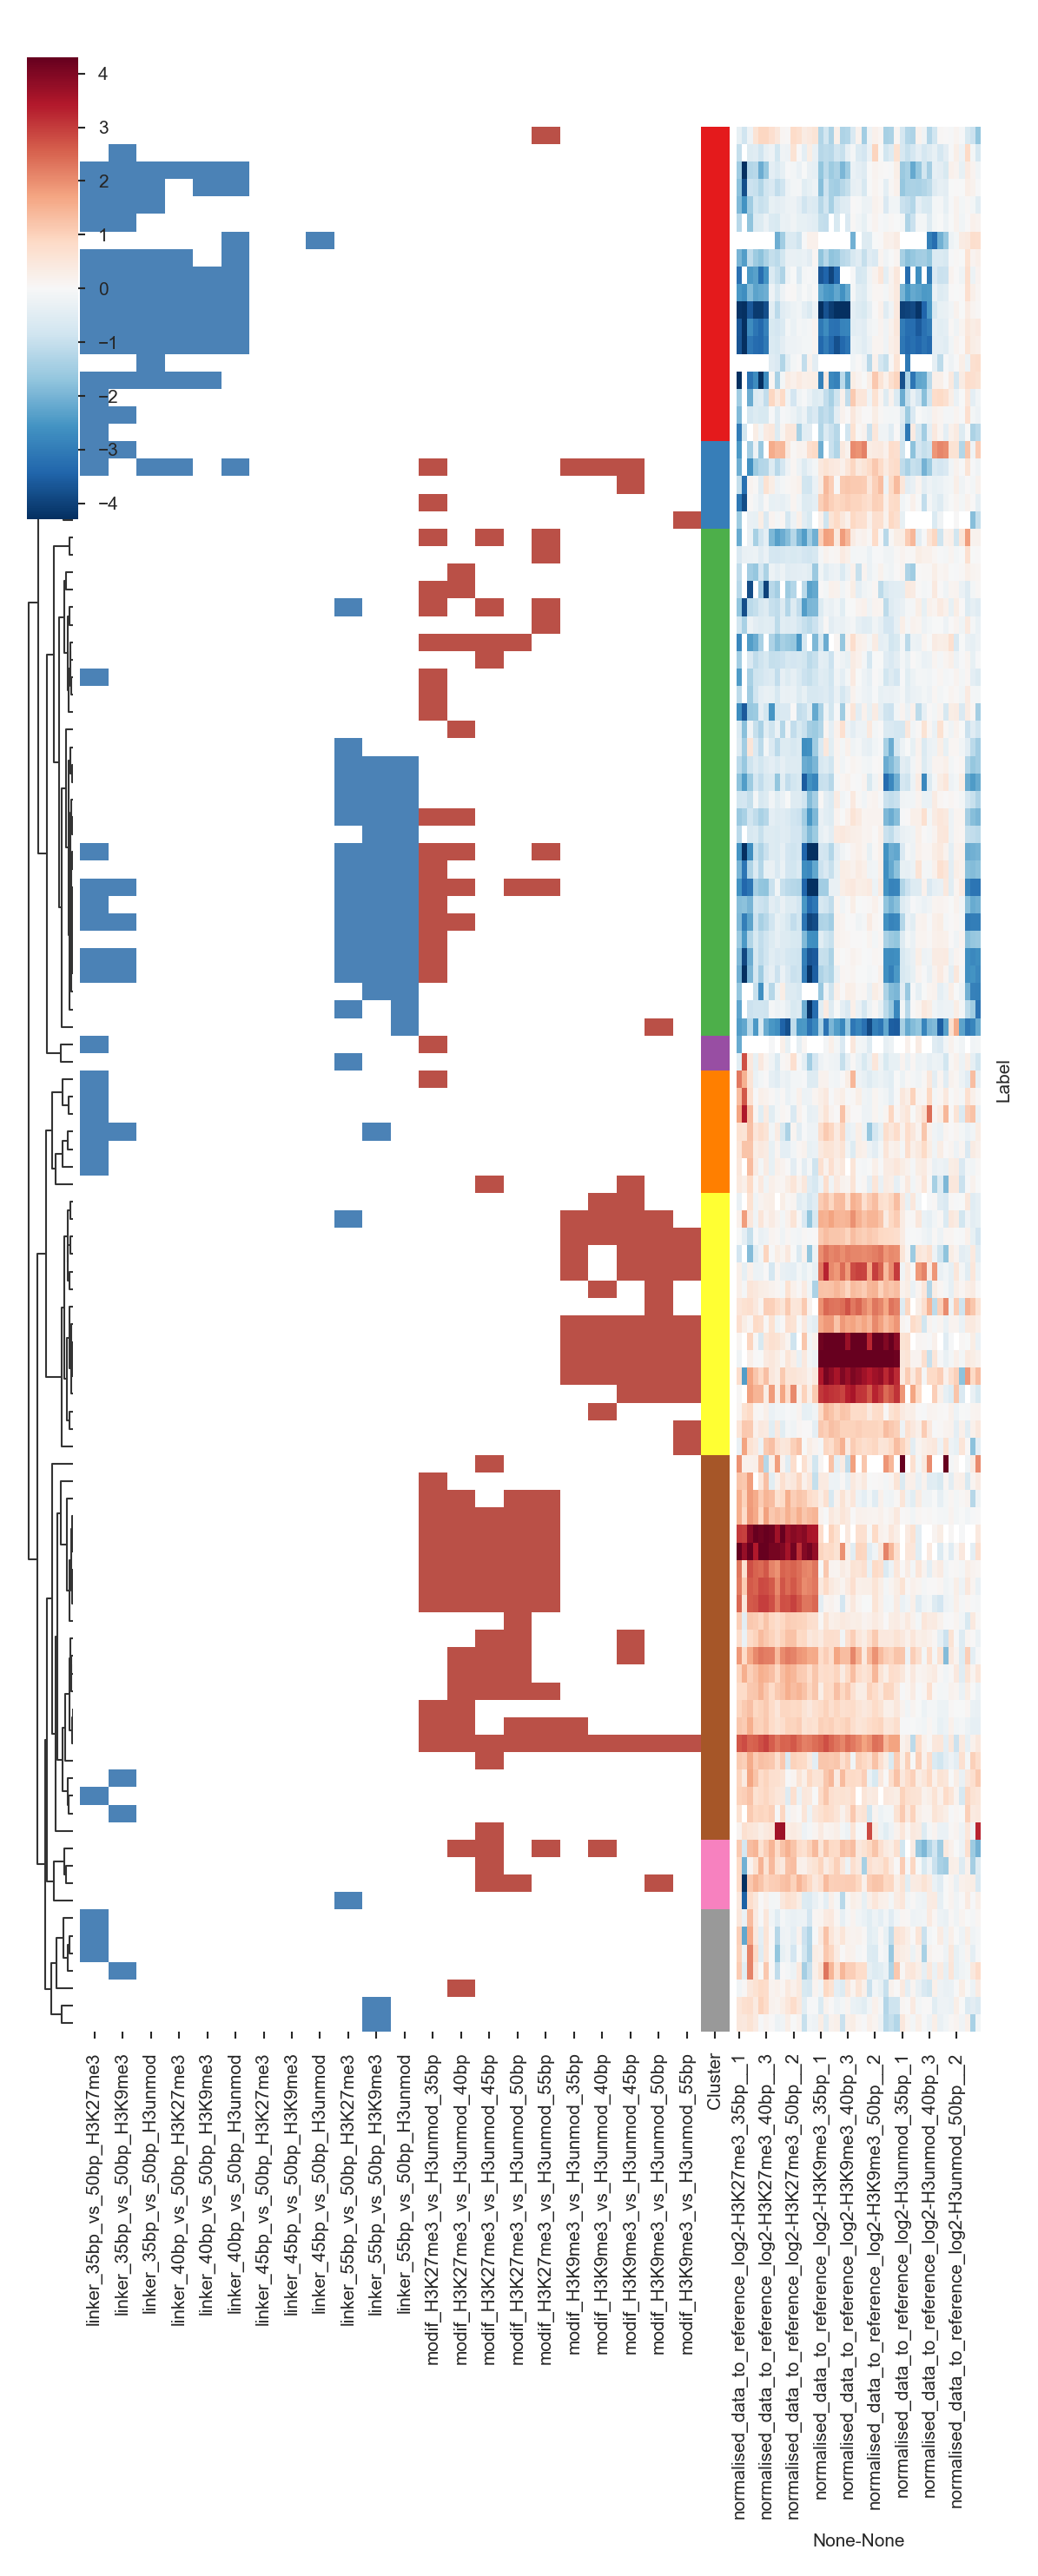

In [50]:

sns.clustermap(matrix_for_clustering, 
               mask=matrix_for_clustering_mask,
               row_linkage=linkage_rows,
               col_cluster=False,
               row_colors=row_colors, 
               yticklabels=False, 
               cmap='RdBu_r', 
               center=0,
               dendrogram_ratio=0.05,
               vmin=-cluster_vmin_vmax,
               vmax=+cluster_vmin_vmax,
               figsize=(FIVE_MM_IN_INCH*20, FIVE_MM_IN_INCH*50)
)

And now, prettier, stylised heatmaps

In [51]:
from seaborn.matrix import ClusterGrid
row_colors.values[linkage_rows_ind]

array([['#FFFFFF', '#FFFFFF', '#FFFFFF', ..., '#FFFFFF', '#FFFFFF',
        '#e41a1c'],
       ['#FFFFFF', '#4B82B6', '#FFFFFF', ..., '#FFFFFF', '#FFFFFF',
        '#e41a1c'],
       ['#4B82B6', '#4B82B6', '#4B82B6', ..., '#FFFFFF', '#FFFFFF',
        '#e41a1c'],
       ...,
       ['#FFFFFF', '#FFFFFF', '#FFFFFF', ..., '#FFFFFF', '#FFFFFF',
        '#999999'],
       ['#FFFFFF', '#FFFFFF', '#FFFFFF', ..., '#FFFFFF', '#FFFFFF',
        '#999999'],
       ['#FFFFFF', '#FFFFFF', '#FFFFFF', ..., '#FFFFFF', '#FFFFFF',
        '#999999']], dtype=object)



Heatmap of protein responses to the short-linkers experiments.
Proteins are plotted in rows, experiments in columns.
Heatmap on the left colour codes proteins that respond to
either linkers (blue) or modifications (red) in each of the experiments.
Only proteins that respond to any linker or modification are shown.

Clustering (ward) dendrograms are shown on the left or the bottom.
Colour scale represents log2 fold change normalised to mean control experiment.




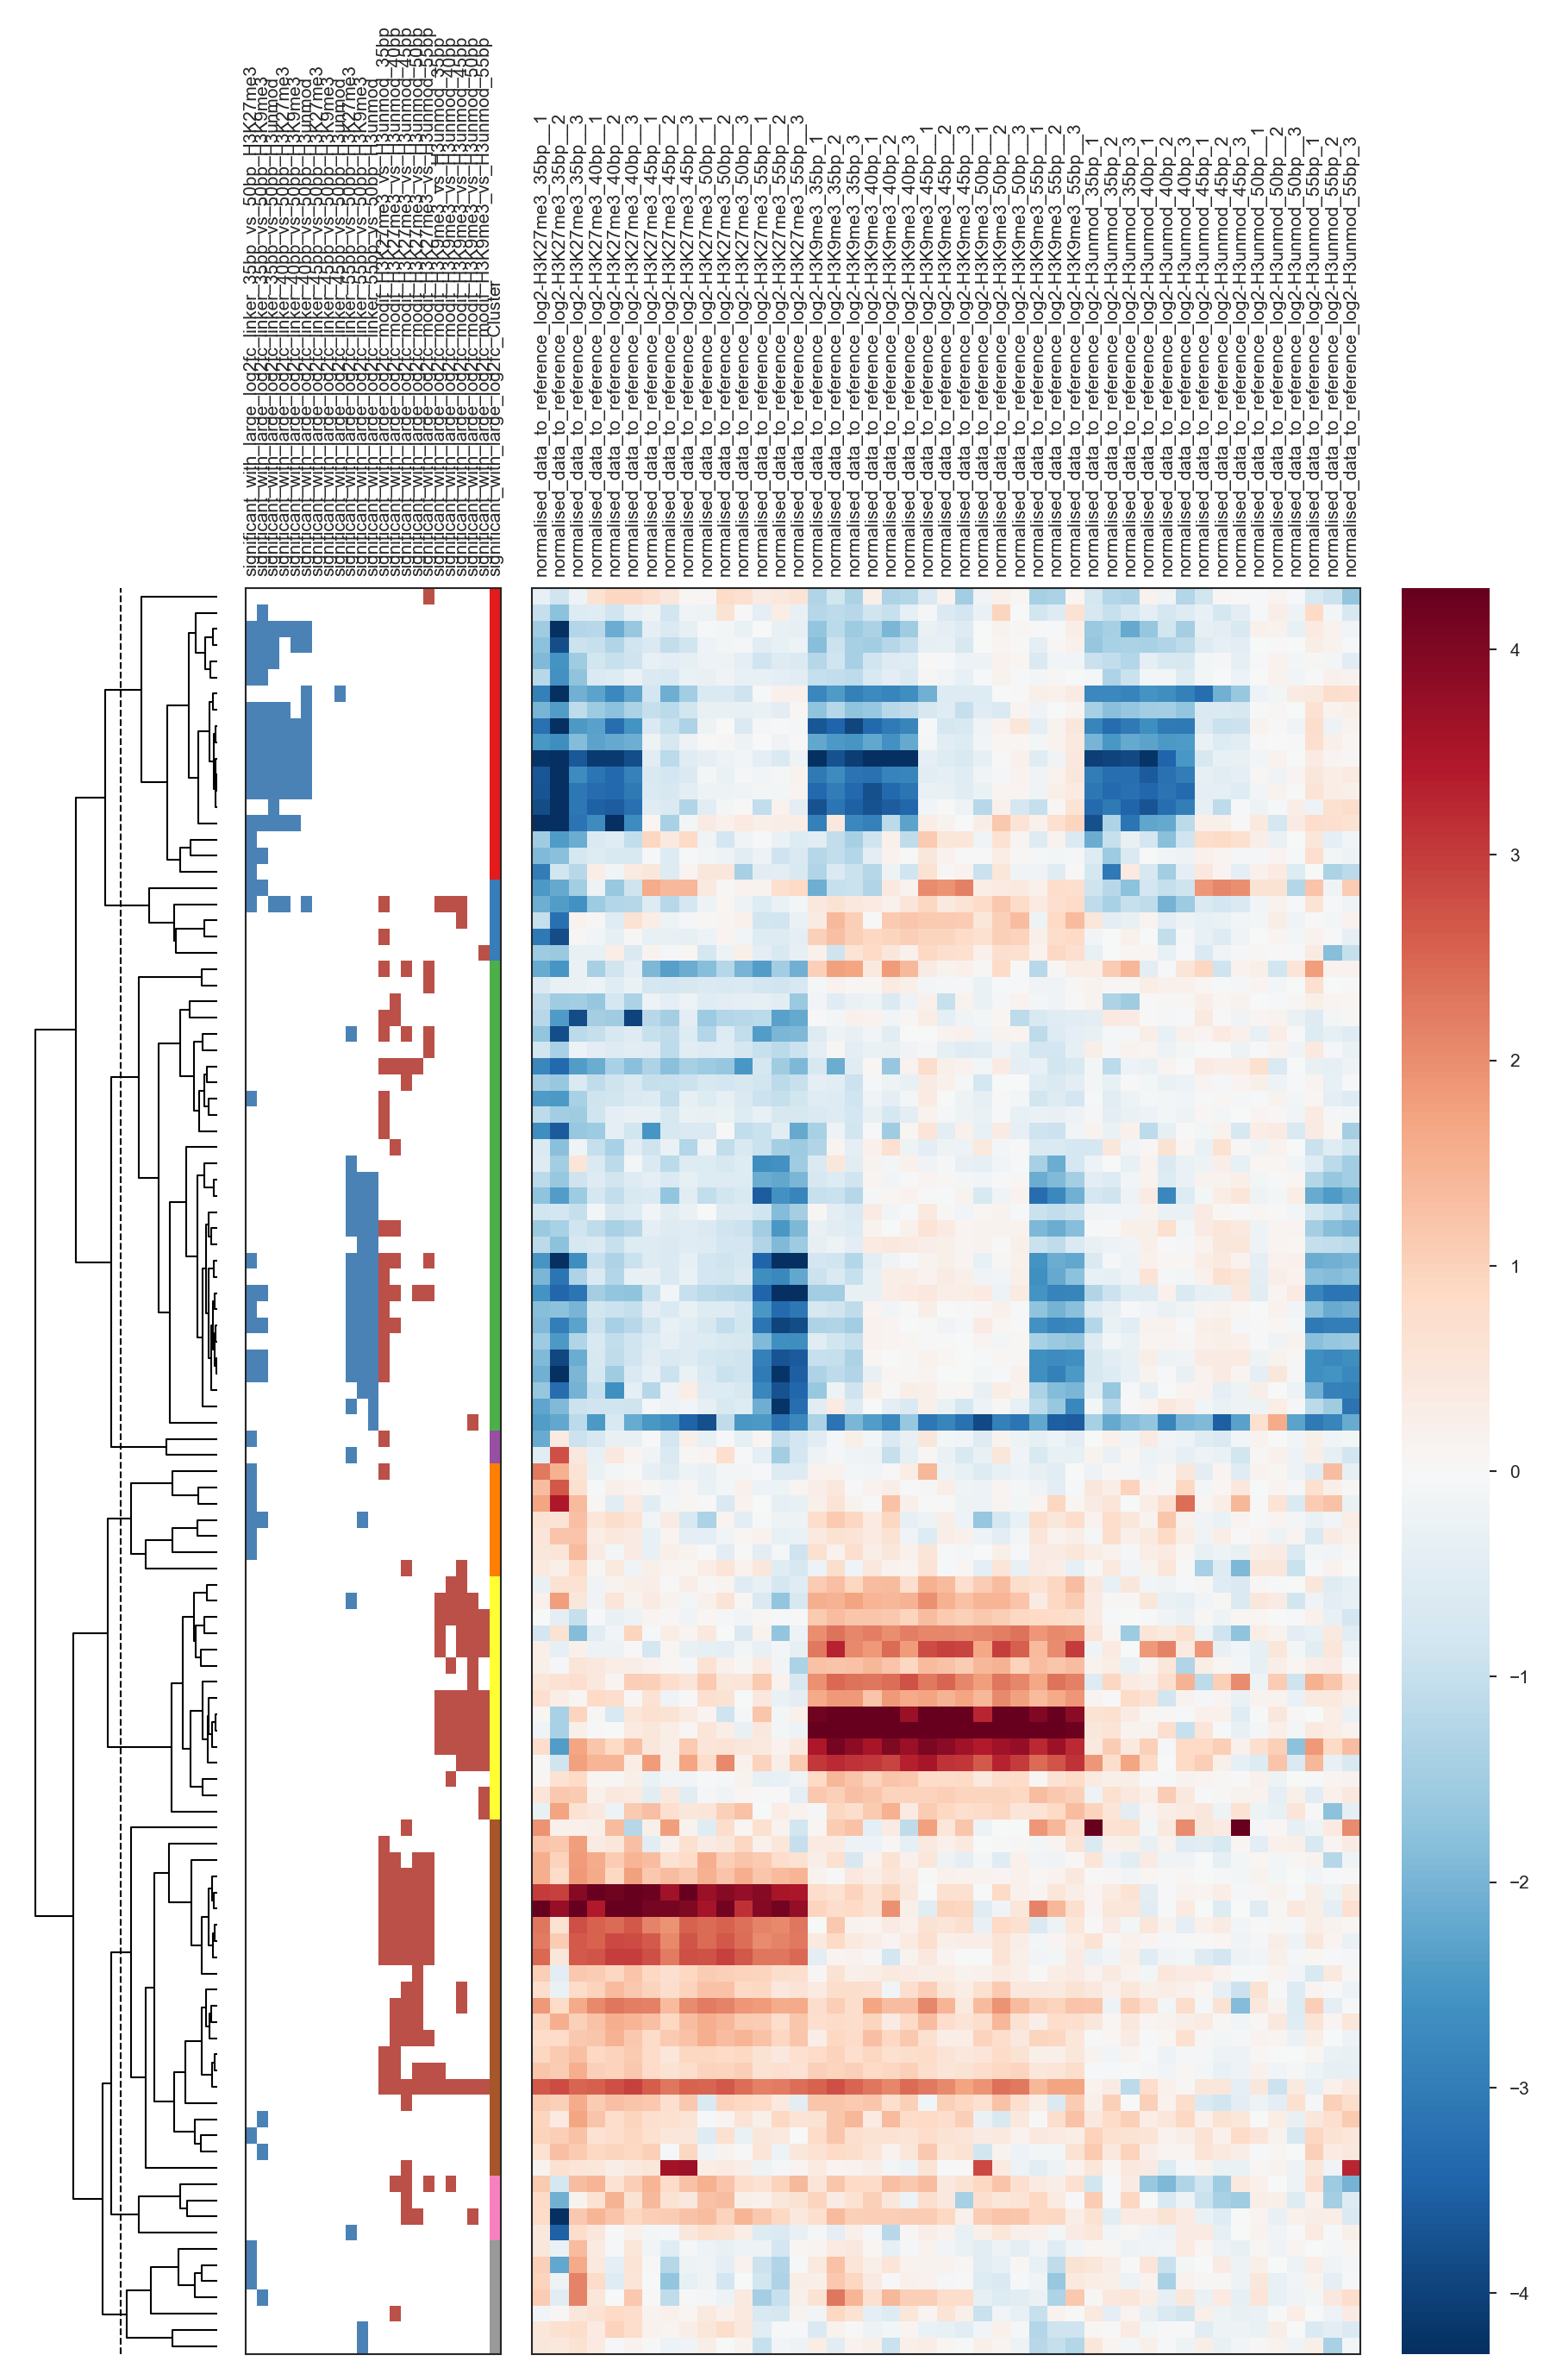

In [52]:
from matplotlib.gridspec import GridSpec


fig = plt.figure(figsize=(30*FIVE_MM_IN_INCH, 50*FIVE_MM_IN_INCH), constrained_layout=True)

gs = GridSpec(2, 3, 
              height_ratios=[0.9, 0.1], 
              width_ratios=[0.15, 0.2, 0.65],
              figure=fig,
              wspace=0.01,
              hspace=0.01,
             )


ax_heatmap = fig.add_subplot(gs[0, 2])
ax_colors_row = fig.add_subplot(gs[0, 1])
ax_dendrogram_row = fig.add_subplot(gs[0, 0])

sns.heatmap(
    matrix_for_clustering.loc[linkage_rows_order],
    cmap='RdBu_r',
    vmin=-cluster_vmin_vmax,
    vmax=cluster_vmin_vmax,
    ax=ax_heatmap,
    xticklabels=1,
    rasterized=True
)

hierarchy.dendrogram(linkage_rows, 
                     ax=ax_dendrogram_row, 
                     link_color_func=lambda x: 'black',
                     orientation='left',
                    )

ax_dendrogram_row.axvline(THRESHOLD, linestyle='--', color='k')

# sns.heatmap inverst axis, we should as well
ax_dendrogram_row.invert_yaxis()

row_color_matrix, row_color_cmap = ClusterGrid.color_list_to_matrix_and_cmap(
    row_colors.values.T, 
    linkage_rows_ind
)
sns.heatmap(row_color_matrix, ax=ax_colors_row, cmap=row_color_cmap, cbar=False, 
            xticklabels=[f'{SIGNIFICANT_COL}_{c}' for c in row_colors.columns], yticklabels=0)

for ax in [ax_heatmap, ax_colors_row]:
    ax.grid(False)
    for spine in ax.spines:
        ax.spines[spine].set_visible(True)
    ax.set_yticks([])
    ax.xaxis.tick_top()
    ax.xaxis.set_tick_params(length=0, rotation=90)
    ax.set_ylabel("")
    ax.set_xlabel("")
    
for ax in [ax_dendrogram_row]:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)
    
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)

_fname = OUTPUT_DIRECTORY / f'02-heatmap-{DATASET}.pdf'
_caption = f"""

Heatmap of protein responses to the {DATASET} experiments.
Proteins are plotted in rows, experiments in columns.
Heatmap on the left colour codes proteins that respond to
either linkers (blue) or modifications (red) in each of the experiments.
Only proteins that respond to any linker or modification are shown.

Clustering (ward) dendrograms are shown on the left or the bottom.
Colour scale represents log2 fold change normalised to mean control experiment.

"""
plt.savefig(_fname, bbox_inches='tight', dpi=DPI)
with open(str(_fname) + '.caption.md', 'w') as f:
    f.write(_caption)
    print(_caption)


    

In [53]:
excel_cluster = pd.DataFrame(cluster.copy())
excel_cluster.columns = pd.MultiIndex.from_tuples([('cluster_classification', 'cluster')])
excel_cluster

,cluster_classification
,cluster
Label,
MYH9,Not clustered
CONT_P22629,Not clustered
SPTAN1 (1),Not clustered
SPTAN1 (2),Not clustered
SPTBN1,Not clustered
...,...
PPIH,Not clustered
REST,Not clustered


In [54]:
cluster.value_counts()

Not clustered        1764
Cluster 3              29
Cluster 7              22
Cluster 1              18
Cluster 6              15
Cluster 5               7
Cluster 9               7
Cluster 2               5
Cluster 8               4
Cluster 4               2
Insufficient data       2
Name: Cluster, dtype: int64

## Writing Excel

In [55]:
import xlsxwriter
from seaborn.utils import relative_luminance

Collect everything in one place

In [56]:
excel_model_outputs_classification

model_classification                  
                modif_responsive linker_responsive
Label                                             
MYH9                       False             False
CONT_P22629                False             False
SPTAN1 (1)                 False             False
SPTAN1 (2)                 False             False
SPTBN1                     False             False
...                          ...               ...
PPIH                       False             False
REST                       False             False
ZMYM2                      False             False
RYR2                       False             False
NES                        False             False

[1875 rows x 2 columns]

In [57]:
cluster

Label
MYH9           Not clustered
CONT_P22629    Not clustered
SPTAN1 (1)     Not clustered
SPTAN1 (2)     Not clustered
SPTBN1         Not clustered
                   ...      
PPIH           Not clustered
REST           Not clustered
ZMYM2          Not clustered
RYR2           Not clustered
NES            Not clustered
Name: Cluster, Length: 1875, dtype: object

In [58]:
df_excel = excel_metadata.join(excel_cluster).join(excel_model_outputs_classification).join(excel_model_outputs_fc_estimates).join(excel_model_comment).join(excel_model_outputs_other).join(excel_model_coefficients).join(excel_normalised_data_reference).join(excel_normalised_data).join(excel_raw_data)
assert not df_excel.index.duplicated().any()
df_excel

metadata                       \
                   Label    Accession    Gene   
Label                                           
MYH9                MYH9       P35579    MYH9   
CONT_P22629  CONT_P22629  CONT_P22629     NaN   
SPTAN1 (1)    SPTAN1 (1)     Q13813-2  SPTAN1   
SPTAN1 (2)    SPTAN1 (2)     Q13813-3  SPTAN1   
SPTBN1            SPTBN1       Q01082  SPTBN1   
...                  ...          ...     ...   
PPIH                PPIH       O43447    PPIH   
REST                REST       Q13127    REST   
ZMYM2              ZMYM2       Q9UBW7   ZMYM2   
RYR2                RYR2       Q92736    RYR2   
NES                  NES       P48681     NES   

                                                                             \
                                                   Description # AAs # PSMs   
Label                                                                         
MYH9                Myosin-9 OS=Homo sapiens GN=MYH9 PE=1 SV=4  1960  35190   
CONT_P22629    Streptavidin OS=Streptomyces avidinii PE=1 SV=1   183  13859   
SPTAN1 (1)   Isoform 2 of Spectrin alpha chain, non-erythro...  2477  14713   
SPTAN1 (2)   Isoform 3 of Spectrin alpha chain, non-erythro...  2452  14454   
SPTBN1       Spectrin beta chain, non-erythrocytic 1 OS=Hom...  2364  12324   
...                                                        ...   ...    ...   
PPIH         Peptidyl-prolyl cis-trans isomerase H OS=Homo ...   177      2   
REST         RE1-silencing transcription factor OS=Homo sap...  1097      2   
ZMYM2        Zinc finger MYM-type protein 2 OS=Homo sapiens...  1377      4   
RYR2         Ryanodine receptor 2 OS=Homo sapiens GN=RYR2 P...  4967      2   
NES                    Nestin OS=Homo sapiens GN=NES PE=1 SV=2  1621     34   

                                                              \
            # Peptides # Peptides (by Search Engine): Mascot   
Label                                                          
MYH9               178                                   178   
CONT_P22629          9                                     9   
SPTAN1 (1)         177                                   177   
SPTAN1 (2)         175                                   175   
SPTBN1             148                                   148   
...                ...                                   ...   
PPIH                 2                                     2   
REST                 2                                     2   
ZMYM2                2                                     2   
RYR2                 2                                     2   
NES                  2                                     2   

                                            ...       raw_data                 \
            # Unique Peptides Coverage [%]  ... H3unmod_40bp_3 H3unmod_45bp_1   
Label                                       ...                                 
MYH9                      142           71  ...   3.044944e+09   3.946367e+09   
CONT_P22629                 9           43  ...   1.315705e+11   1.630744e+11   
SPTAN1 (1)                  4           74  ...   2.975633e+08   3.424137e+08   
SPTAN1 (2)                  2           74  ...   1.273656e+07   5.081667e+07   
SPTBN1                     16           73  ...   3.767596e+08   5.129878e+08   
...                       ...          ...  ...            ...            ...   
PPIH                        2           11  ...   5.161312e+06   5.793653e+06   
REST                        2            3  ...   4.037978e+06   6.090768e+06   
ZMYM2                       2            3  ...   2.219889e+06   2.993301e+06   
RYR2                        2            0  ...   6.226795e+07   7.910849e+07   
NES                         2            1  ...   9.937108e+06   1.262545e+07   

                                                                           \
            H3unmod_45bp_2 H3unmod_45bp_3 H3unmod_50bp__1 H3unmod_50bp__2   
Label                               

Reorder the data as follows:

- Order clustered proteins by cluster order.
- Place insufficient data proteins after the cluster, ordered by P-value
- Place other proteins after these, ordered by P-value

In [59]:
_order = excel_model_outputs_other.loc(axis=1)[:,'P.Value'].min(axis=1).sort_values().index

excel_order = list(linkage_rows_order)
excel_order += [o for o in _order if cluster.get(o) == 'Insufficient data']
excel_order += [o for o in _order if cluster.get(o) == 'Not clustered']

assert set(excel_order) == set(data_metadata.index)

df_excel = df_excel.loc[excel_order]
df_excel

metadata                      \
           Label  Accession     Gene   
Label                                  
RNF2        RNF2     Q99496     RNF2   
CREM        CREM  Q03060-31     CREM   
JUN          JUN     P05412      JUN   
CREB5      CREB5     Q02930    CREB5   
TFAM        TFAM     Q00059     TFAM   
...          ...        ...      ...   
HSPH1      HSPH1     Q92598    HSPH1   
ATM          ATM     Q13315      ATM   
S100A7    S100A7     P31151   S100A7   
NPR1        NPR1     P16066     NPR1   
GPATCH1  GPATCH1     Q9BRR8  GPATCH1   

                                                                         \
                                               Description # AAs # PSMs   
Label                                                                     
RNF2     E3 ubiquitin-protein ligase RING2 OS=Homo sapi...   336    486   
CREM     Isoform 28 of cAMP-responsive element modulato...   299    246   
JUN      Transcription factor AP-1 OS=Homo sapiens GN=J...   331    251   
CREB5    Cyclic AMP-responsive element-binding protein ...   508    278   
TFAM     Transcription factor A, mitochondrial OS=Homo ...   246    799   
...                                                    ...   ...    ...   
HSPH1    Heat shock protein 105 kDa OS=Homo sapiens GN=...   858      2   
ATM      Serine-protein kinase ATM OS=Homo sapiens GN=A...  3056      2   
S100A7   Protein S100-A7 OS=Homo sapiens GN=S100A7 PE=1...   101      2   
NPR1     Atrial natriuretic peptide receptor 1 OS=Homo ...  1061      2   
GPATCH1  G patch domain-containing protein 1 OS=Homo sa...   931      2   

                                                                            \
        # Peptides # Peptides (by Search Engine): Mascot # Unique Peptides   
Label                                                                        
RNF2            12                                    12                10   
CREM             5                                     5                 2   
JUN              7                                     7                 6   
CREB5           12                                    12                12   
TFAM            12                                    12                12   
...            ...                                   ...               ...   
HSPH1            2                                     2                 2   
ATM              2                                     2                 2   
S100A7           2                                     2                 2   
NPR1             2                                     2                 2   
GPATCH1          2                                     2                 2   

                      ...       raw_data                                \
        Coverage [%]  ... H3unmod_40bp_3 H3unmod_45bp_1 H3unmod_45bp_2   
Label                 ...                                                
RNF2              49  ...   5.801290e+07   9.347346e+07   1.353233e+08   
CREM              33  ...   5.615898e+06   7.568278e+06   4.605019e+06   
JUN               39  ...   2.320763e+07   5.800666e+07   4.384352e+07   
CREB5             29  ...   1.814733e+07   3.164123e+07   2.850891e+07   
TFAM              37  ...   6.089123e+08   1.107221e+09   8.853996e+08   
...              ...  ...            ...            ...            ...   
HSPH1              3  ...   7.541324e+06   0.000000e+00   0.000000e+00   
ATM                1  ...   0.000000e+00   0.000000e+00   0.000000e+00   
S100A7            22  ...   2.637049e+06   0.000000e+00   0.000000e+00   
NPR1               2  ...   0.000000e+00   0.000000e+00   0.000000e+00   
GPATCH1            5  ...   0.000000e+00   0.000000e+00   0.000000e+00   

                                                                        \
        H3unmod_45bp_3 H3unmod_50bp__1 H3unmod_50bp__2 H3unmod_50bp__3   
Label                                                                    
RNF2      1.323781e+08    1.638789e+08    2.

In [60]:
from seaborn.utils import relative_luminance

In [61]:
output_xlsx = OUTPUT_DIRECTORY / f'01-model-results.{DATASET}.xlsx'
output_csv = OUTPUT_DIRECTORY / f'01-model-results.{DATASET}.csv.gz'

COLUMN_GROUPS = {
    'Metadata': excel_metadata.columns,
    'Classification': excel_model_outputs_classification.columns,
    'Log2(FC) estimates (incl. imputed)': list(excel_model_outputs_fc_estimates.columns),
    'Comment': list(excel_model_comment.columns),
}

GROUP_DEPTHS = {
    # 'Comment': 2, # Merging the two rows for the comment group makes excel file not sortable
}

for coef in MODEL_COEFS:
    COLUMN_GROUPS[f'Model outputs for {coef}'] = list(excel_model_outputs_other[[f'model_estimates_for_{coef}']].columns)

COLUMN_GROUPS = {
    **COLUMN_GROUPS,
    'Classification': list(excel_cluster) + list(excel_model_outputs_classification),
    'Model coefficient estimates': list(excel_model_coefficients),
    'Normalised data (to reference, log2)': list(excel_normalised_data_reference),
    'Normalised data (log2)': list(excel_normalised_data),
    'Raw data': list(excel_raw_data),
}

RENAMES = {}

for col in excel_model_outputs_fc_estimates.columns:
    RENAMES[col] = col[0].partition('model_estimates_for_')[2]
    
_simple_renames = []
_simple_renames.extend(excel_cluster.columns)
_simple_renames.extend(excel_model_outputs_classification.columns)
_simple_renames.extend(excel_metadata.columns)
_simple_renames.extend(excel_model_outputs_other.columns)
_simple_renames.extend(excel_model_coefficients.columns)
_simple_renames.extend(excel_normalised_data_reference.columns)
_simple_renames.extend(excel_normalised_data.columns)
_simple_renames.extend(excel_raw_data.columns)
_simple_renames.extend(excel_model_comment.columns)

for col in _simple_renames:
    RENAMES[col] = col[1]
    

writer = pd.ExcelWriter(output_xlsx, engine='xlsxwriter')
workbook = writer.book

bold = workbook.add_format({'bold': True})
bold_right = workbook.add_format({'bold': True, 'right': 1})

bold_rotated = workbook.add_format({'bold': True, 'rotation':90})
bold_rotated_right = workbook.add_format({'bold': True, 'rotation':90, 'right': 1})

merged_format = workbook.add_format({
    'bold': 1,
    'align': 'center',
    'valign': 'vcenter',
    'right': 1,
    'text_wrap': True,
})

right_border = workbook.add_format({
    'right': 1,
})

sheet_name = f"Summary"

first_data_row = 2
first_data_col = 0

# pandas does not support writing to Excel with multi-index and header=False
# so quickly remove the index, from the DF we're writing
# (it won't make a difference as we will handle header columns ourselves)
_df_excel_nomultiindex = df_excel.copy()
_df_excel_nomultiindex.columns = ['___'.join(map(str, c)) for c in df_excel.columns]
# Write this df as csv:
_df_excel_nomultiindex.to_csv(output_csv)
# And into excel
_df_excel_nomultiindex.to_excel(
    writer, 
    sheet_name=sheet_name, 
    startrow=first_data_row, 
    startcol=first_data_col, 
    index=False, 
    header=False
)

last_data_row = first_data_row + len(df_excel)
last_data_col = first_data_col + len(df_excel.columns)

worksheet = writer.sheets[sheet_name]

SEPARATOR_COLUMNS = {v[-1] for v in COLUMN_GROUPS.values()}

colname_to_index_map = {}
for i, col in enumerate(df_excel.columns, start=first_data_col):
    fmt_ = bold_rotated if not col in SEPARATOR_COLUMNS else bold_rotated_right
    
    worksheet.write(first_data_row-1, i, RENAMES.get(col, str(col)), fmt_)
    colname_to_index_map[col] = i

for merged_name, col_list in COLUMN_GROUPS.items():
    _first = colname_to_index_map[col_list[0]]
    _last = colname_to_index_map[col_list[-1]]
    
    rows_to_merge = GROUP_DEPTHS.get(merged_name, 1)
    
    if _first == _last and rows_to_merge == 1:
        # Cannot merge one column only
        worksheet.write(first_data_row-2, _first, merged_name, merged_format)
    else:
        worksheet.merge_range(
            first_data_row-2, colname_to_index_map[col_list[0]], 
            first_data_row-2+(rows_to_merge-1), colname_to_index_map[col_list[-1]],
            merged_name,
            merged_format
        )
        
for col in SEPARATOR_COLUMNS:
    worksheet.set_column(colname_to_index_map[col], colname_to_index_map[col], cell_format=right_border)

color_red = '#b2182b'
format_red = workbook.add_format({'bg_color': color_red})
color_red_lighter = '#f4a582'

color_white = '#f7f7f7'

color_blue = '#2166ac'
format_blue = workbook.add_format({'bg_color': color_blue})
color_blue_lighter = '#92c5de'
       
    
three_color_columns = list(COLUMN_GROUPS['Log2(FC) estimates (incl. imputed)'])
three_color_columns += [c for c in excel_model_outputs_other.columns if c[1] == 'logFC']

for col in three_color_columns:
    
    _limit = df_excel[col].abs().replace(np.inf, np.nan).quantile(0.98)
    print(f"Excel formatting limit for {col}: +/-{_limit}")
    
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col],
        {
            'type': '3_color_scale',
            'min_type': 'num',
            'max_type': 'num',
            'mid_type': 'num',
            'min_value': -_limit,
            'max_value': _limit,
            'mid_value': 0,
            'max_color': color_red,
            'mid_color': color_white,
            'min_color': color_blue,

        }
    )
    
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col], 
        {'type': 'cell',
        'criteria': '==',
        'value': '"inf"',
        'format': format_red}
    )
    
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col], 
        {'type': 'cell',
        'criteria': '==',
        'value': '"-inf"',
        'format': format_blue}
    )
    
# Also use 3-colours for reference-normalised data but have joint limits

_limit_ref_norm = cluster_vmin_vmax

for col in excel_normalised_data_reference.columns:
    _limit = _limit_ref_norm
    print(f"Excel formatting limit for {col}: +/-{_limit}")

    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col],
        {
            'type': '3_color_scale',
            'min_type': 'num',
            'max_type': 'num',
            'mid_type': 'num',
            'min_value': -_limit,
            'max_value': _limit,
            'mid_value': 0,
            'max_color': color_red,
            'mid_color': color_white,
            'min_color': color_blue,

        }
    )
    
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col], 
        {'type': 'cell',
        'criteria': '==',
        'value': '"inf"',
        'format': format_red}
    )
    
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col], 
        {'type': 'cell',
        'criteria': '==',
        'value': '"-inf"',
        'format': format_blue}
    )
    
databar_columns = list(COLUMN_GROUPS['Model coefficient estimates']) + list(excel_normalised_data.columns) + list(excel_raw_data.columns) 

for col in databar_columns:
    
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col],
        {
            'type': 'data_bar',
            'min_type': 'percentile',
            'max_type': 'percentile',
            'min_value': 1,
            'max_value': 99,

        }
    )
    

boolean_columns_good = [c for c in excel_model_outputs_other.columns if c[1] in ['significant', 'significant_with_large_log2fc']]
boolean_columns_good += list(excel_model_outputs_classification.columns)

boolean_columns_bad = [c for c in excel_model_outputs_other.columns if c[1] in ['logFC_is_imputed', 'logFC_based_on_single_datapoint']]

bold_green = workbook.add_format({'bold': True, 'font_color': '#1b7837'})
bold_red = workbook.add_format({'bold': True, 'font_color': color_red})
for col in boolean_columns_good:
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col], 
        {'type': 'cell',
        'criteria': '==',
        'value': 'TRUE',
        'format': bold_green}
    )

for col in boolean_columns_bad:
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col], 
        {'type': 'cell',
        'criteria': '==',
        'value': 'TRUE',
        'format': bold_red}
    )
    
for col in excel_cluster.columns:
    
    for _clust, _color in cluster_palette.items():
        
        lum = relative_luminance(_color)
        text_color = "#000000" if lum > .408 else "#FFFFFF"
        fmt = workbook.add_format({'bold': True, 'bg_color': _color, 'font_color': text_color})
        
        worksheet.conditional_format(
            first_data_row, colname_to_index_map[col], 
            last_data_row, colname_to_index_map[col], 
            {'type': 'cell',
            'criteria': '==',
            'value': f'"{_clust}"',
            'format': fmt}
        )
    fmt = workbook.add_format({'bold': True, 'font_color': '#FF0000'})
        
    worksheet.conditional_format(
        first_data_row, colname_to_index_map[col], 
        last_data_row, colname_to_index_map[col], 
        {'type': 'cell',
        'criteria': '==',
        'value': '"Insufficient data"',
        'format': fmt}
    )  
    

# Narrow columns
narrow_columns = []
narrow_columns.extend([c for c in data_metadata if c[1] in ['# PSMs', '# Peptides', '# Unique Peptides', 'Coverage [%]']])
    
for col in narrow_columns:
    worksheet.set_column(colname_to_index_map[col], colname_to_index_map[col], 4)

worksheet.set_column(colname_to_index_map[('metadata', 'Description')], colname_to_index_map[('metadata', 'Description')], 40)
worksheet.set_column(colname_to_index_map[('model_estimates', 'comment')], colname_to_index_map[('model_estimates', 'comment')], 40)

worksheet.freeze_panes(first_data_row, colname_to_index_map[('metadata', 'Description')] + 1)
worksheet.autofilter(first_data_row-1, first_data_col, last_data_row, last_data_col)
      
writer.save()
print("Done!")

Excel formatting limit for ('model_estimates_for_linker_35bp_vs_50bp_H3K27me3', 'logFC_imputed'): +/-1.5826436906046406
Excel formatting limit for ('model_estimates_for_linker_35bp_vs_50bp_H3K9me3', 'logFC_imputed'): +/-1.4198986303695609
Excel formatting limit for ('model_estimates_for_linker_35bp_vs_50bp_H3unmod', 'logFC_imputed'): +/-1.4714007602217927
Excel formatting limit for ('model_estimates_for_linker_40bp_vs_50bp_H3K27me3', 'logFC_imputed'): +/-1.086539410827888
Excel formatting limit for ('model_estimates_for_linker_40bp_vs_50bp_H3K9me3', 'logFC_imputed'): +/-1.2444675066957673
Excel formatting limit for ('model_estimates_for_linker_40bp_vs_50bp_H3unmod', 'logFC_imputed'): +/-1.3041224642692892
Excel formatting limit for ('model_estimates_for_linker_45bp_vs_50bp_H3K27me3', 'logFC_imputed'): +/-1.085831659300399
Excel formatting limit for ('model_estimates_for_linker_45bp_vs_50bp_H3K9me3', 'logFC_imputed'): +/-1.1293792870329566
Excel formatting limit for ('model_estimates_fo

Done!
